# Getting Started with AuctionGym
## Effects of Competition in Second-Price Auctions

AuctionGym has several configuration options that detail the type of auction, how bidders behave, and how confounded the contextual information is that bidders observe. To avoid clutter, we define these in configuration files.
For the purposes of this introductory notebook, we will ignore some aspects such as repeated runs.

We parse an existing file, detailing a second-price auction with truthful oracle bidders.
We will look into the effects of increased competition on the auctioneer's revenue, social welfare and surplus.
For this, we repeat simulated experiments with a single changed parameter over runs: 'num_participants_per_round'.

In [4]:
!pip install numba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 2.5 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 4.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from tqdm.notebook import tqdm

In [12]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_variance,\
obs_embedding_size = parse_config('../config/FP_DM_Oracle.json')

In [13]:
def run_repeated_auctions(num_participants_per_round):
    # Placeholders for output
    auction_revenue = []
    social_welfare = []
    social_surplus = []
    
    # Set the environmental parameter
    config['num_participants_per_round'] = num_participants_per_round
    
    # Instantiate Agent and Auction objects
    agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)

    # Instantiate Auction object
    auction, num_iter, rounds_per_iter, output_dir =\
        instantiate_auction(rng,
                            config,
                            agents2items,
                            agents2item_values,
                            agents,
                            max_slots,
                            embedding_size,
                            embedding_variance,
                            obs_embedding_size)

    # Run repeated auctions
    # This logic is encoded in the `simulation_run()` method in main.py
    for i in tqdm(range(num_iter)):

        # Simulate impression opportunities
        for _ in range(rounds_per_iter):
            auction.simulate_opportunity()

        # Log 'Gross utility' or welfare
        social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

        # Log 'Net utility' or surplus
        social_surplus.append(sum([agent.net_utility for agent in auction.agents]))
        
        # Update agents (does nothing in this example, as we have truthful oracles)
        # Clear running metrics
        for agent_id, agent in enumerate(auction.agents):
            agent.update(iteration=i)
            agent.clear_utility()
            agent.clear_logs()

        # Log revenue
        auction_revenue.append(auction.revenue)
        auction.clear_revenue()
        
    # Rescale metrics per auction round
    auction_revenue = np.array(auction_revenue) / rounds_per_iter
    social_welfare = np.array(social_welfare) / rounds_per_iter
    social_surplus = np.array(social_surplus) / rounds_per_iter
    
    return auction_revenue, social_welfare, social_surplus

  0%|          | 0/20 [00:00<?, ?it/s]

/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 27288/32768 [00:09<00:01, 2774.80it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 27288
AUC predicting P(win):				 0.7790309751825323



Oracle, DM (search) 2: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32768/32768 [00:12<00:00, 2535.38it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC predicting P(win):				 0.7397037698829794



Oracle, DM (search) 3:  43%|█████████████████████████████████████████████████████████▉                                                                            | 14164/32768 [00:03<00:05, 3701.51it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 14164
AUC predicting P(win):				 0.6242280468966825



Oracle, DM (search) 4:  55%|█████████████████████████████████████████████████████████████████████████▎                                                            | 17942/32768 [00:04<00:03, 4389.16it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 17942
AUC predicting P(win):				 0.7514115398988076



Oracle, DM (search) 5:  39%|███████████████████████████████████████████████████▉                                                                                  | 12708/32768 [00:03<00:04, 4013.54it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 12708
AUC predicting P(win):				 0.7533155143667212



Oracle, DM (search) 6:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 26927/32768 [00:08<00:01, 3018.84it/s]


Stopping at Epoch 26927
AUC predicting P(win):				 0.7345119644521403


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:  33%|████████████████████████████████████████████                                                                                          | 10770/32768 [00:06<00:14, 1556.70it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 10770
AUC predicting P(win):				 0.7792288939729213



Oracle, DM (search) 2:  45%|████████████████████████████████████████████████████████████▏                                                                         | 14721/32768 [00:03<00:04, 3781.25it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 14721
AUC predicting P(win):				 0.7504124314732119



Oracle, DM (search) 3:  35%|███████████████████████████████████████████████                                                                                       | 11502/32768 [00:02<00:04, 4978.29it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 11502
AUC predicting P(win):				 0.646565660221436



Oracle, DM (search) 4:  41%|██████████████████████████████████████████████████████▉                                                                               | 13446/32768 [00:03<00:05, 3745.45it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 13446
AUC predicting P(win):				 0.7657078673996522



Oracle, DM (search) 5:  20%|██████████████████████████▋                                                                                                            | 6480/32768 [00:01<00:04, 5274.06it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 6480
AUC predicting P(win):				 0.7295183830674369



Oracle, DM (search) 6:  26%|███████████████████████████████████▏                                                                                                   | 8531/32768 [00:01<00:04, 5492.94it/s]


Stopping at Epoch 8531
AUC predicting P(win):				 0.7213441982990878


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:  12%|████████████████▌                                                                                                                      | 4026/32768 [00:00<00:04, 5893.84it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4026
AUC predicting P(win):				 0.7666459791728929



Oracle, DM (search) 2:  11%|██████████████▉                                                                                                                        | 3633/32768 [00:00<00:04, 5851.77it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3633
AUC predicting P(win):				 0.7483865302642796



Oracle, DM (search) 3:  12%|████████████████▎                                                                                                                      | 3970/32768 [00:00<00:05, 5649.06it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3970
AUC predicting P(win):				 0.6926776129026418



Oracle, DM (search) 4:  16%|█████████████████████▏                                                                                                                 | 5131/32768 [00:00<00:04, 6038.19it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 5131
AUC predicting P(win):				 0.7241303289377364



Oracle, DM (search) 5:  14%|███████████████████                                                                                                                    | 4621/32768 [00:00<00:05, 5477.20it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4621
AUC predicting P(win):				 0.7371646771217578



Oracle, DM (search) 6:  10%|█████████████▍                                                                                                                         | 3270/32768 [00:00<00:05, 5759.08it/s]


Stopping at Epoch 3270
AUC predicting P(win):				 0.7349756905344451


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   3%|████▌                                                                                                                                  | 1100/32768 [00:00<00:05, 6066.89it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1100
AUC predicting P(win):				 0.759939945947648



Oracle, DM (search) 2:   9%|████████████                                                                                                                           | 2932/32768 [00:00<00:05, 5809.47it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2932
AUC predicting P(win):				 0.7649899411425964



Oracle, DM (search) 3:   5%|██████▏                                                                                                                                | 1505/32768 [00:00<00:05, 5946.34it/s]
/Users/AndriiRoiko/auction-gym/src/Bidder.py:265: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1505
AUC predicting P(win):				 0.7041738255507438



Oracle, DM (search) 4:   6%|████████▍                                                                                                                              | 2039/32768 [00:00<00:05, 5485.99it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2039
AUC predicting P(win):				 0.7069021861962385



Oracle, DM (search) 5:   7%|██████████                                                                                                                             | 2445/32768 [00:00<00:05, 5742.78it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2445
AUC predicting P(win):				 0.737106190867669



Oracle, DM (search) 6:   5%|██████▏                                                                                                                                | 1516/32768 [00:00<00:05, 5402.17it/s]


Stopping at Epoch 1516
AUC predicting P(win):				 0.7481996185681393


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   7%|█████████▏                                                                                                                             | 2228/32768 [00:00<00:05, 5923.02it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2228
AUC predicting P(win):				 0.7920317209777988



Oracle, DM (search) 2:   3%|███▌                                                                                                                                    | 867/32768 [00:00<00:05, 5853.56it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 867
AUC predicting P(win):				 0.7164930120420161



Oracle, DM (search) 3:   5%|███████                                                                                                                                | 1706/32768 [00:00<00:04, 6329.18it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1706
AUC predicting P(win):				 0.6862264208291299



Oracle, DM (search) 4:   8%|███████████▏                                                                                                                           | 2713/32768 [00:00<00:04, 6263.65it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2713
AUC predicting P(win):				 0.7519220869423109



Oracle, DM (search) 5:   8%|██████████▋                                                                                                                            | 2600/32768 [00:00<00:04, 6215.87it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2600
AUC predicting P(win):				 0.7286176635083563



Oracle, DM (search) 6:   3%|███▍                                                                                                                                    | 842/32768 [00:00<00:05, 6218.25it/s]


Stopping at Epoch 842
AUC predicting P(win):				 0.7170108156166111


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   3%|███▉                                                                                                                                    | 942/32768 [00:00<00:05, 5992.86it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 942
AUC predicting P(win):				 0.7475486644697623



Oracle, DM (search) 2:   3%|████▌                                                                                                                                  | 1098/32768 [00:00<00:05, 6181.36it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1098
AUC predicting P(win):				 0.7523412295683887



Oracle, DM (search) 3:   4%|█████▍                                                                                                                                 | 1314/32768 [00:00<00:04, 6303.64it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1314
AUC predicting P(win):				 0.6963719929124779



Oracle, DM (search) 4:   2%|███▏                                                                                                                                    | 760/32768 [00:00<00:05, 5912.77it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 760
AUC predicting P(win):				 0.69786409520497



Oracle, DM (search) 5:   3%|███▉                                                                                                                                    | 954/32768 [00:00<00:05, 5755.17it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 954
AUC predicting P(win):				 0.7470603146699355



Oracle, DM (search) 6:   5%|██████▊                                                                                                                                | 1648/32768 [00:00<00:04, 6286.41it/s]


Stopping at Epoch 1648
AUC predicting P(win):				 0.7557579391100703


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   3%|████▌                                                                                                                                  | 1095/32768 [00:00<00:05, 6140.62it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1095
AUC predicting P(win):				 0.7993879456478175



Oracle, DM (search) 2:   3%|███▍                                                                                                                                    | 843/32768 [00:00<00:05, 6176.95it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 843
AUC predicting P(win):				 0.7264051812110374



Oracle, DM (search) 3:   3%|███▊                                                                                                                                    | 923/32768 [00:00<00:05, 5820.95it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 923
AUC predicting P(win):				 0.6854991894980202



Oracle, DM (search) 4:   2%|██▋                                                                                                                                     | 661/32768 [00:00<00:05, 6119.25it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 661
AUC predicting P(win):				 0.706629160575592



Oracle, DM (search) 5:   2%|██▌                                                                                                                                     | 607/32768 [00:00<00:05, 6064.06it/s]

Stopping at Epoch 1148


Oracle, DM (search) 5:   4%|████▋                                                                                                                                  | 1148/32768 [00:00<00:05, 6015.98it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC predicting P(win):				 0.7529206829451879



Oracle, DM (search) 6:   2%|██▉                                                                                                                                     | 718/32768 [00:00<00:05, 6196.38it/s]

Stopping at Epoch 718
AUC predicting P(win):				 0.7200632913660685



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   3%|███▊                                                                                                                                    | 917/32768 [00:00<00:05, 6081.75it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 917
AUC predicting P(win):				 0.7476141746854182



Oracle, DM (search) 2:   3%|████                                                                                                                                   | 1001/32768 [00:00<00:05, 6186.45it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1001
AUC predicting P(win):				 0.7546727307272123



Oracle, DM (search) 3:   2%|███▎                                                                                                                                    | 802/32768 [00:00<00:05, 6184.36it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 802
AUC predicting P(win):				 0.7037192782732622



Oracle, DM (search) 4:   2%|██▉                                                                                                                                     | 717/32768 [00:00<00:05, 6173.64it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 717
AUC predicting P(win):				 0.7051149934392509



Oracle, DM (search) 5:   4%|█████▌                                                                                                                                 | 1339/32768 [00:00<00:05, 5948.65it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1339
AUC predicting P(win):				 0.7575528431162466



Oracle, DM (search) 6:   2%|██▍                                                                                                                                     | 595/32768 [00:00<00:05, 6227.94it/s]


Stopping at Epoch 595
AUC predicting P(win):				 0.7289132896745285


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   2%|███                                                                                                                                     | 748/32768 [00:00<00:05, 5909.12it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 748
AUC predicting P(win):				 0.7872697247719793



Oracle, DM (search) 2:   2%|███▏                                                                                                                                    | 757/32768 [00:00<00:05, 6002.65it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 757
AUC predicting P(win):				 0.7293682767124452



Oracle, DM (search) 3:   3%|████▏                                                                                                                                  | 1025/32768 [00:00<00:05, 6176.29it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1025
AUC predicting P(win):				 0.6895814846566098



Oracle, DM (search) 4:   3%|███▌                                                                                                                                    | 865/32768 [00:00<00:07, 4492.74it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 865
AUC predicting P(win):				 0.7456761756588528



Oracle, DM (search) 5:   2%|███▏                                                                                                                                    | 757/32768 [00:00<00:05, 5886.48it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 757
AUC predicting P(win):				 0.7273511465300095



Oracle, DM (search) 6:   2%|███                                                                                                                                     | 726/32768 [00:00<00:05, 6155.29it/s]


Stopping at Epoch 726
AUC predicting P(win):				 0.7305149530929189


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   2%|███▎                                                                                                                                    | 785/32768 [00:00<00:05, 6034.79it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 785
AUC predicting P(win):				 0.7609413907806989



Oracle, DM (search) 2:   3%|████                                                                                                                                    | 989/32768 [00:00<00:05, 6131.90it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 989
AUC predicting P(win):				 0.7599901113724591



Oracle, DM (search) 3:   2%|██▉                                                                                                                                     | 718/32768 [00:00<00:06, 5290.70it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 718
AUC predicting P(win):				 0.6994199958385352



Oracle, DM (search) 4:   3%|███▋                                                                                                                                    | 882/32768 [00:00<00:05, 6028.75it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 882
AUC predicting P(win):				 0.6843646435860392



Oracle, DM (search) 5:   2%|██▊                                                                                                                                     | 671/32768 [00:00<00:05, 5879.78it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 671
AUC predicting P(win):				 0.7537875416394552



Oracle, DM (search) 6:   3%|███▌                                                                                                                                    | 858/32768 [00:00<00:05, 6185.20it/s]


Stopping at Epoch 858
AUC predicting P(win):				 0.7367056095225655


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   2%|██▋                                                                                                                                     | 659/32768 [00:00<00:05, 6032.55it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 659
AUC predicting P(win):				 0.7711535228540078



Oracle, DM (search) 2:   3%|███▋                                                                                                                                    | 881/32768 [00:00<00:05, 6109.87it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 881
AUC predicting P(win):				 0.7337694852644128



Oracle, DM (search) 3:   2%|███▎                                                                                                                                    | 803/32768 [00:00<00:05, 6040.19it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 803
AUC predicting P(win):				 0.7099089710062934



Oracle, DM (search) 4:   2%|███▏                                                                                                                                    | 783/32768 [00:00<00:05, 6174.24it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 783
AUC predicting P(win):				 0.7249638046969757



Oracle, DM (search) 5:   3%|████▎                                                                                                                                  | 1058/32768 [00:00<00:05, 6036.27it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1058
AUC predicting P(win):				 0.7221544046773904



Oracle, DM (search) 6:   2%|███▍                                                                                                                                    | 819/32768 [00:00<00:05, 6143.70it/s]

Stopping at Epoch 819
AUC predicting P(win):				 0.7145138583526007



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   2%|██▊                                                                                                                                     | 664/32768 [00:00<00:05, 5972.41it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 664
AUC predicting P(win):				 0.7637504383018585



Oracle, DM (search) 2:   2%|███▎                                                                                                                                    | 803/32768 [00:00<00:05, 6099.09it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 803
AUC predicting P(win):				 0.7614394717550754



Oracle, DM (search) 3:   3%|████▌                                                                                                                                  | 1101/32768 [00:00<00:05, 6119.83it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1101
AUC predicting P(win):				 0.6549495085334247



Oracle, DM (search) 4:   2%|███                                                                                                                                     | 743/32768 [00:00<00:05, 6037.40it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 743
AUC predicting P(win):				 0.7032375582926422



Oracle, DM (search) 5:   2%|███▎                                                                                                                                    | 794/32768 [00:00<00:05, 6022.58it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 794
AUC predicting P(win):				 0.7608492821377817



Oracle, DM (search) 6:   2%|██▍                                                                                                                                     | 598/32768 [00:00<00:05, 6270.31it/s]


Stopping at Epoch 598
AUC predicting P(win):				 0.7246992513148272


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   2%|███▏                                                                                                                                    | 766/32768 [00:00<00:05, 5959.65it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 766
AUC predicting P(win):				 0.7803843878238027



Oracle, DM (search) 2:   3%|███▊                                                                                                                                    | 927/32768 [00:00<00:05, 6063.74it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 927
AUC predicting P(win):				 0.7260383472723927



Oracle, DM (search) 3:   3%|████▍                                                                                                                                  | 1076/32768 [00:00<00:05, 6210.35it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1076
AUC predicting P(win):				 0.722232660245634



Oracle, DM (search) 4:   2%|███                                                                                                                                     | 723/32768 [00:00<00:05, 6115.40it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 723
AUC predicting P(win):				 0.7257027473888125



Oracle, DM (search) 5:   3%|███▍                                                                                                                                    | 839/32768 [00:00<00:05, 6078.25it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 839
AUC predicting P(win):				 0.7230223050285066



Oracle, DM (search) 6:   2%|███▎                                                                                                                                    | 789/32768 [00:00<00:05, 6163.97it/s]


Stopping at Epoch 789
AUC predicting P(win):				 0.7271530090220075


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   3%|███▌                                                                                                                                    | 862/32768 [00:00<00:05, 6006.05it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 862
AUC predicting P(win):				 0.7579315409830369



Oracle, DM (search) 2:   3%|███▋                                                                                                                                    | 880/32768 [00:00<00:05, 6138.27it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 880
AUC predicting P(win):				 0.7768107050749002



Oracle, DM (search) 3:   4%|████▋                                                                                                                                  | 1147/32768 [00:00<00:05, 6145.29it/s]

Stopping at Epoch 1147



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC predicting P(win):				 0.6820471801039969



Oracle, DM (search) 4:   2%|███▏                                                                                                                                    | 773/32768 [00:00<00:05, 6106.33it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 773
AUC predicting P(win):				 0.702150895288959



Oracle, DM (search) 5:   3%|███▌                                                                                                                                    | 864/32768 [00:00<00:05, 5994.39it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 864
AUC predicting P(win):				 0.7498588266626409



Oracle, DM (search) 6:   2%|██▍                                                                                                                                     | 593/32768 [00:00<00:05, 6218.62it/s]


Stopping at Epoch 593
AUC predicting P(win):				 0.73234973511909


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   2%|██▉                                                                                                                                     | 716/32768 [00:00<00:05, 6032.97it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 716
AUC predicting P(win):				 0.7830177513471507



Oracle, DM (search) 2:   3%|███▉                                                                                                                                    | 957/32768 [00:00<00:05, 6176.99it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 957
AUC predicting P(win):				 0.7164956471157926



Oracle, DM (search) 3:   4%|█████▍                                                                                                                                 | 1306/32768 [00:00<00:05, 6054.43it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1306
AUC predicting P(win):				 0.6925058939542615



Oracle, DM (search) 4:   2%|██▋                                                                                                                                     | 658/32768 [00:00<00:05, 6063.06it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 658
AUC predicting P(win):				 0.7181195889164075



Oracle, DM (search) 5:   3%|███▊                                                                                                                                    | 916/32768 [00:00<00:05, 6028.43it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 916
AUC predicting P(win):				 0.7509927779038275



Oracle, DM (search) 6:   2%|██▉                                                                                                                                     | 714/32768 [00:00<00:05, 6192.98it/s]


Stopping at Epoch 714
AUC predicting P(win):				 0.7391626126426313


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   2%|███▎                                                                                                                                    | 807/32768 [00:00<00:05, 6130.69it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 807
AUC predicting P(win):				 0.7657505633992117



Oracle, DM (search) 2:   2%|███▎                                                                                                                                    | 798/32768 [00:00<00:05, 6092.58it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 798
AUC predicting P(win):				 0.7606778368672841



Oracle, DM (search) 3:   2%|██▍                                                                                                                                     | 582/32768 [00:00<00:05, 6100.18it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 582
AUC predicting P(win):				 0.7024472680369542



Oracle, DM (search) 4:   2%|██▊                                                                                                                                     | 682/32768 [00:00<00:05, 6067.50it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 682
AUC predicting P(win):				 0.7207718373578973



Oracle, DM (search) 5:   3%|███▊                                                                                                                                    | 921/32768 [00:00<00:05, 5926.00it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 921
AUC predicting P(win):				 0.7406176577534125



Oracle, DM (search) 6:   2%|██▍                                                                                                                                     | 601/32768 [00:00<00:05, 6261.07it/s]


Stopping at Epoch 601
AUC predicting P(win):				 0.7279410893581731


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   2%|██▎                                                                                                                                     | 549/32768 [00:00<00:05, 6031.32it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 549
AUC predicting P(win):				 0.7659294271168122



Oracle, DM (search) 2:   3%|███▌                                                                                                                                    | 859/32768 [00:00<00:05, 6069.30it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 859
AUC predicting P(win):				 0.7418215823675409



Oracle, DM (search) 3:   3%|███▌                                                                                                                                    | 860/32768 [00:00<00:05, 6097.51it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 860
AUC predicting P(win):				 0.6910801594558129



Oracle, DM (search) 4:   3%|███▉                                                                                                                                    | 941/32768 [00:00<00:05, 6131.01it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 941
AUC predicting P(win):				 0.7337729359584124



Oracle, DM (search) 5:   3%|████▌                                                                                                                                  | 1101/32768 [00:00<00:05, 5999.54it/s]

Stopping at Epoch 1101
AUC predicting P(win):				 0.7548592831446872



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 6:   2%|██▋                                                                                                                                     | 651/32768 [00:00<00:05, 6169.21it/s]


Stopping at Epoch 651
AUC predicting P(win):				 0.7299824044052983


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   2%|██▊                                                                                                                                     | 677/32768 [00:00<00:05, 5848.76it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 677
AUC predicting P(win):				 0.7752307995421537



Oracle, DM (search) 2:   2%|██▎                                                                                                                                     | 572/32768 [00:00<00:05, 6015.80it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 572
AUC predicting P(win):				 0.7460952528929533



Oracle, DM (search) 3:   2%|███▏                                                                                                                                    | 779/32768 [00:00<00:05, 5929.59it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 779
AUC predicting P(win):				 0.703063509421891



Oracle, DM (search) 4:   2%|██▉                                                                                                                                     | 718/32768 [00:00<00:05, 6091.25it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 718
AUC predicting P(win):				 0.6987901479539209



Oracle, DM (search) 5:   2%|██▋                                                                                                                                     | 646/32768 [00:00<00:05, 5897.99it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 646
AUC predicting P(win):				 0.7455061223606785



Oracle, DM (search) 6:   2%|██▌                                                                                                                                     | 620/32768 [00:00<00:05, 5669.86it/s]


Stopping at Epoch 620
AUC predicting P(win):				 0.7313862502998718


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   2%|██▉                                                                                                                                     | 699/32768 [00:00<00:05, 6096.46it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 699
AUC predicting P(win):				 0.7641658103277745



Oracle, DM (search) 2:   2%|██▍                                                                                                                                     | 587/32768 [00:00<00:05, 6221.32it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 587
AUC predicting P(win):				 0.7436082739307441



Oracle, DM (search) 3:   3%|████▎                                                                                                                                  | 1058/32768 [00:00<00:05, 6105.72it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1058
AUC predicting P(win):				 0.6690592265701616



Oracle, DM (search) 4:   3%|████                                                                                                                                    | 972/32768 [00:00<00:05, 6011.17it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 972
AUC predicting P(win):				 0.7442255460226005



Oracle, DM (search) 5:   3%|███▉                                                                                                                                    | 939/32768 [00:00<00:05, 5490.94it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 939
AUC predicting P(win):				 0.7509459945985152



Oracle, DM (search) 6:   3%|███▍                                                                                                                                    | 821/32768 [00:00<00:05, 6188.70it/s]

Stopping at Epoch 821
AUC predicting P(win):				 0.7148999829277962



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   2%|███▎                                                                                                                                    | 811/32768 [00:00<00:05, 6038.41it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 811
AUC predicting P(win):				 0.7735079280242295



Oracle, DM (search) 2:   3%|███▌                                                                                                                                    | 859/32768 [00:00<00:05, 5845.01it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 859
AUC predicting P(win):				 0.7400404931028008



Oracle, DM (search) 3:   4%|████▉                                                                                                                                  | 1196/32768 [00:00<00:05, 6161.13it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1196
AUC predicting P(win):				 0.7206165163651301



Oracle, DM (search) 4:   3%|███▌                                                                                                                                    | 844/32768 [00:00<00:05, 5764.44it/s]

Stopping at Epoch 844
AUC predicting P(win):				 0.6817145104822037



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 5:   2%|██▋                                                                                                                                     | 645/32768 [00:00<00:05, 5770.67it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 645
AUC predicting P(win):				 0.7415980136775162



Oracle, DM (search) 6:   2%|██▉                                                                                                                                     | 716/32768 [00:00<00:05, 6202.20it/s]

Stopping at Epoch 716
AUC predicting P(win):				 0.7337862812375749


  0%|          | 0/20 [00:00<?, ?it/s]

/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 32359/32768 [00:06<00:00, 5348.60it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 32359
AUC predicting P(win):				 0.800251521705341



Oracle, DM (search) 2:  62%|██████████████████████████████████████████████████████████████████████████████████▋                                                   | 20234/32768 [00:03<00:02, 5312.37it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 20234
AUC predicting P(win):				 0.8007406533607992



Oracle, DM (search) 3:  48%|███████████████████████████████████████████████████████████████▉                                                                      | 15621/32768 [00:02<00:03, 5230.72it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 15621
AUC predicting P(win):				 0.6110302899134418



Oracle, DM (search) 4:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 31347/32768 [00:06<00:00, 5223.72it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 31347
AUC predicting P(win):				 0.794527672949355



Oracle, DM (search) 5:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 30405/32768 [00:05<00:00, 5212.71it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 30405
AUC predicting P(win):				 0.7292735804640278



Oracle, DM (search) 6: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32768/32768 [00:06<00:00, 5326.20it/s]


AUC predicting P(win):				 0.7704512573861536


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:  32%|██████████████████████████████████████████▉                                                                                           | 10510/32768 [00:01<00:04, 5270.42it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 10510
AUC predicting P(win):				 0.8067242965896099



Oracle, DM (search) 2:  16%|█████████████████████▎                                                                                                                 | 5180/32768 [00:00<00:05, 5300.37it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 5180
AUC predicting P(win):				 0.776817893155419



Oracle, DM (search) 3:  44%|██████████████████████████████████████████████████████████▋                                                                           | 14351/32768 [00:02<00:03, 5362.01it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 14351
AUC predicting P(win):				 0.6882470281713076



Oracle, DM (search) 4:  36%|████████████████████████████████████████████████▌                                                                                     | 11868/32768 [00:02<00:04, 5155.33it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 11868
AUC predicting P(win):				 0.7918874372555265



Oracle, DM (search) 5:  33%|███████████████████████████████████████████▊                                                                                          | 10728/32768 [00:02<00:04, 5289.43it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 10728
AUC predicting P(win):				 0.7398287579896079



Oracle, DM (search) 6:  32%|██████████████████████████████████████████▌                                                                                           | 10413/32768 [00:02<00:04, 5155.55it/s]


Stopping at Epoch 10413
AUC predicting P(win):				 0.7633175466255518


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:  10%|█████████████▏                                                                                                                         | 3209/32768 [00:00<00:05, 5193.48it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3209
AUC predicting P(win):				 0.8012533001433205



Oracle, DM (search) 2:  11%|██████████████▌                                                                                                                        | 3539/32768 [00:00<00:05, 5279.65it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3539
AUC predicting P(win):				 0.7711359973638711



Oracle, DM (search) 3:  13%|██████████████████▏                                                                                                                    | 4409/32768 [00:00<00:05, 5320.68it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4409
AUC predicting P(win):				 0.7279388635622571



Oracle, DM (search) 4:   8%|██████████▎                                                                                                                            | 2514/32768 [00:00<00:05, 5129.31it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2514
AUC predicting P(win):				 0.7330156489563627



Oracle, DM (search) 5:  12%|███████████████▋                                                                                                                       | 3820/32768 [00:00<00:05, 5278.13it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3820
AUC predicting P(win):				 0.7491027572409573



Oracle, DM (search) 6:  11%|██████████████▎                                                                                                                        | 3482/32768 [00:00<00:05, 5306.03it/s]


Stopping at Epoch 3482
AUC predicting P(win):				 0.7722039820555927


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|█████▍                                                                                                                                 | 1312/32768 [00:00<00:06, 5090.20it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1312
AUC predicting P(win):				 0.7989799517484805



Oracle, DM (search) 2:   4%|████▋                                                                                                                                  | 1149/32768 [00:00<00:06, 5190.85it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1149
AUC predicting P(win):				 0.7846761667287216



Oracle, DM (search) 3:   2%|███▎                                                                                                                                    | 789/32768 [00:00<00:06, 5251.84it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 789
AUC predicting P(win):				 0.7028769591252279



Oracle, DM (search) 4:   4%|█████▋                                                                                                                                 | 1382/32768 [00:00<00:06, 5161.24it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1382
AUC predicting P(win):				 0.7676054318667886



Oracle, DM (search) 5:   4%|██████                                                                                                                                 | 1461/32768 [00:00<00:06, 5170.07it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1461
AUC predicting P(win):				 0.7543971928468923



Oracle, DM (search) 6:   3%|████▎                                                                                                                                  | 1061/32768 [00:00<00:06, 5209.86it/s]


Stopping at Epoch 1061
AUC predicting P(win):				 0.7587532106783368


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|█████▋                                                                                                                                 | 1375/32768 [00:00<00:06, 5161.14it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1375
AUC predicting P(win):				 0.8113529456879438



Oracle, DM (search) 2:   3%|███▍                                                                                                                                    | 826/32768 [00:00<00:06, 5205.54it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 826
AUC predicting P(win):				 0.7711215709067862



Oracle, DM (search) 3:   7%|██████████                                                                                                                             | 2443/32768 [00:00<00:05, 5273.88it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2443
AUC predicting P(win):				 0.7369781891212392



Oracle, DM (search) 4:   3%|████▎                                                                                                                                  | 1035/32768 [00:00<00:06, 5029.08it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1035
AUC predicting P(win):				 0.713564192352754



Oracle, DM (search) 5:   5%|███████▏                                                                                                                               | 1731/32768 [00:00<00:06, 4992.43it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1731
AUC predicting P(win):				 0.7604195909598901



Oracle, DM (search) 6:   3%|████                                                                                                                                    | 990/32768 [00:00<00:06, 5156.60it/s]


Stopping at Epoch 990
AUC predicting P(win):				 0.7674944476564369


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   3%|████▋                                                                                                                                  | 1143/32768 [00:00<00:06, 5045.62it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1143
AUC predicting P(win):				 0.7799018175442698



Oracle, DM (search) 2:   3%|████▏                                                                                                                                  | 1002/32768 [00:00<00:07, 3983.56it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1002
AUC predicting P(win):				 0.7834121560545251



Oracle, DM (search) 3:   4%|█████                                                                                                                                  | 1239/32768 [00:00<00:06, 4713.30it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1239
AUC predicting P(win):				 0.7067732355398817



Oracle, DM (search) 4:   4%|█████▉                                                                                                                                 | 1429/32768 [00:00<00:07, 4364.65it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1429
AUC predicting P(win):				 0.7903253968253969



Oracle, DM (search) 5:   4%|█████                                                                                                                                  | 1236/32768 [00:00<00:08, 3747.55it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1236
AUC predicting P(win):				 0.7351576804282479



Oracle, DM (search) 6:   2%|███                                                                                                                                     | 727/32768 [00:00<00:07, 4420.25it/s]

Stopping at Epoch 727
AUC predicting P(win):				 0.7558644972132186



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   3%|████▋                                                                                                                                  | 1138/32768 [00:00<00:06, 4909.70it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1138
AUC predicting P(win):				 0.8335881312090752



Oracle, DM (search) 2:   2%|███▏                                                                                                                                    | 753/32768 [00:00<00:06, 5012.79it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 753
AUC predicting P(win):				 0.7654886561954625



Oracle, DM (search) 3:   4%|█████                                                                                                                                  | 1242/32768 [00:00<00:06, 4759.44it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1242
AUC predicting P(win):				 0.7470336639924914



Oracle, DM (search) 4:   4%|█████▍                                                                                                                                 | 1330/32768 [00:00<00:06, 4765.75it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1330
AUC predicting P(win):				 0.6896155910940325



Oracle, DM (search) 5:   3%|████                                                                                                                                    | 970/32768 [00:00<00:06, 4939.63it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 970
AUC predicting P(win):				 0.7712439255430871



Oracle, DM (search) 6:   3%|███▊                                                                                                                                    | 928/32768 [00:00<00:06, 5222.72it/s]

Stopping at Epoch 928
AUC predicting P(win):				 0.7782389612350373



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   3%|████▍                                                                                                                                  | 1065/32768 [00:00<00:06, 4915.06it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1065
AUC predicting P(win):				 0.780354985584904



Oracle, DM (search) 2:   3%|████▎                                                                                                                                  | 1054/32768 [00:00<00:06, 5092.53it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1054
AUC predicting P(win):				 0.8009203645100115



Oracle, DM (search) 3:   5%|██████▎                                                                                                                                | 1541/32768 [00:00<00:06, 5064.51it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1541
AUC predicting P(win):				 0.6973870380153555



Oracle, DM (search) 4:   4%|████▋                                                                                                                                  | 1147/32768 [00:00<00:06, 5054.76it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1147
AUC predicting P(win):				 0.7877448308587076



Oracle, DM (search) 5:   3%|████▌                                                                                                                                  | 1122/32768 [00:00<00:06, 4896.89it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1122
AUC predicting P(win):				 0.7356081677731827



Oracle, DM (search) 6:   2%|███                                                                                                                                     | 740/32768 [00:00<00:06, 5162.33it/s]


Stopping at Epoch 740
AUC predicting P(win):				 0.7585185162953003


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   3%|████                                                                                                                                    | 987/32768 [00:00<00:06, 4958.38it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 987
AUC predicting P(win):				 0.8225486568161898



Oracle, DM (search) 2:   4%|████▉                                                                                                                                  | 1195/32768 [00:00<00:06, 5167.12it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1195
AUC predicting P(win):				 0.73777618179431



Oracle, DM (search) 3:   3%|███▋                                                                                                                                    | 902/32768 [00:00<00:06, 4953.49it/s]

Stopping at Epoch 902
AUC predicting P(win):				 0.7487927017644511



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 4:   4%|█████▍                                                                                                                                 | 1327/32768 [00:00<00:06, 5007.13it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1327
AUC predicting P(win):				 0.6940982853392403



Oracle, DM (search) 5:   4%|████▊                                                                                                                                  | 1165/32768 [00:00<00:06, 4891.65it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1165
AUC predicting P(win):				 0.784944846604619



Oracle, DM (search) 6:   2%|███▏                                                                                                                                    | 762/32768 [00:00<00:06, 5144.65it/s]


Stopping at Epoch 762
AUC predicting P(win):				 0.7818304281176294


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   3%|████▌                                                                                                                                  | 1118/32768 [00:00<00:09, 3306.62it/s]


Stopping at Epoch 1118


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC predicting P(win):				 0.77302541248656



Oracle, DM (search) 2:   4%|█████                                                                                                                                  | 1221/32768 [00:00<00:07, 4335.65it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1221
AUC predicting P(win):				 0.8055286977293251



Oracle, DM (search) 3:   3%|████▏                                                                                                                                  | 1030/32768 [00:00<00:07, 4310.51it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1030
AUC predicting P(win):				 0.6961704843417604



Oracle, DM (search) 4:   4%|████▊                                                                                                                                  | 1166/32768 [00:00<00:07, 4382.39it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1166
AUC predicting P(win):				 0.7984790822626773



Oracle, DM (search) 5:   4%|█████                                                                                                                                  | 1220/32768 [00:00<00:06, 4906.20it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1220
AUC predicting P(win):				 0.7186346014409386



Oracle, DM (search) 6:   3%|███▊                                                                                                                                    | 907/32768 [00:00<00:06, 4912.80it/s]

Stopping at Epoch 907


AUC predicting P(win):				 0.7563309700765419


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   3%|████▋                                                                                                                                  | 1144/32768 [00:00<00:06, 4934.35it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1144
AUC predicting P(win):				 0.830840018249146



Oracle, DM (search) 2:   4%|█████                                                                                                                                  | 1226/32768 [00:00<00:06, 4940.24it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1226
AUC predicting P(win):				 0.7459469796558097



Oracle, DM (search) 3:   3%|████                                                                                                                                    | 988/32768 [00:00<00:08, 3752.25it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 988
AUC predicting P(win):				 0.7384713310829796



Oracle, DM (search) 4:   4%|█████                                                                                                                                  | 1215/32768 [00:00<00:06, 4762.48it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1215
AUC predicting P(win):				 0.7100329374290897



Oracle, DM (search) 5:   3%|███▊                                                                                                                                    | 933/32768 [00:00<00:06, 4822.38it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 933
AUC predicting P(win):				 0.7749571761110222



Oracle, DM (search) 6:   2%|██▉                                                                                                                                     | 720/32768 [00:00<00:10, 3152.87it/s]


Stopping at Epoch 720
AUC predicting P(win):				 0.7676381265593751


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|█████▍                                                                                                                                 | 1326/32768 [00:00<00:08, 3611.17it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1326
AUC predicting P(win):				 0.7560149299284233



Oracle, DM (search) 2:   3%|████                                                                                                                                    | 990/32768 [00:00<00:07, 4438.35it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 990
AUC predicting P(win):				 0.7958822065691052



Oracle, DM (search) 3:   3%|████▌                                                                                                                                  | 1105/32768 [00:00<00:07, 4137.72it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1105
AUC predicting P(win):				 0.7129973523297333



Oracle, DM (search) 4:   3%|████▍                                                                                                                                  | 1070/32768 [00:00<00:07, 4387.89it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1070
AUC predicting P(win):				 0.7829075863284614



Oracle, DM (search) 5:   4%|█████▍                                                                                                                                 | 1318/32768 [00:00<00:09, 3266.57it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1318
AUC predicting P(win):				 0.7328384436096552



Oracle, DM (search) 6:   2%|███▏                                                                                                                                    | 776/32768 [00:00<00:07, 4565.48it/s]

Stopping at Epoch 776


AUC predicting P(win):				 0.7584567269392519


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|█████▎                                                                                                                                 | 1297/32768 [00:00<00:06, 4728.28it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1297
AUC predicting P(win):				 0.8300513930849521



Oracle, DM (search) 2:   3%|████▏                                                                                                                                  | 1013/32768 [00:00<00:06, 4807.47it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1013
AUC predicting P(win):				 0.7602665521593104



Oracle, DM (search) 3:   3%|███▋                                                                                                                                    | 894/32768 [00:00<00:06, 4741.83it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 894
AUC predicting P(win):				 0.7413412131946758



Oracle, DM (search) 4:   3%|████▍                                                                                                                                  | 1071/32768 [00:00<00:06, 4683.02it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1071
AUC predicting P(win):				 0.7161440648254254



Oracle, DM (search) 5:   3%|████▎                                                                                                                                  | 1048/32768 [00:00<00:06, 4579.72it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1048
AUC predicting P(win):				 0.7708313133415738



Oracle, DM (search) 6:   2%|███                                                                                                                                     | 731/32768 [00:00<00:06, 4899.50it/s]


Stopping at Epoch 731
AUC predicting P(win):				 0.7751101380288479


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   3%|████▋                                                                                                                                  | 1135/32768 [00:00<00:06, 4681.76it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1135
AUC predicting P(win):				 0.7723788948865143



Oracle, DM (search) 2:   3%|███▌                                                                                                                                    | 858/32768 [00:00<00:06, 5092.26it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 858
AUC predicting P(win):				 0.7953933237247812



Oracle, DM (search) 3:   3%|███▍                                                                                                                                    | 841/32768 [00:00<00:06, 5034.91it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 841
AUC predicting P(win):				 0.705736921729437



Oracle, DM (search) 4:   3%|████▎                                                                                                                                  | 1050/32768 [00:00<00:06, 4748.06it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1050
AUC predicting P(win):				 0.7893608488100087



Oracle, DM (search) 5:   3%|███▉                                                                                                                                    | 940/32768 [00:00<00:07, 4361.97it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 940
AUC predicting P(win):				 0.7308297349819548



Oracle, DM (search) 6:   3%|████▏                                                                                                                                  | 1013/32768 [00:00<00:06, 4729.57it/s]


Stopping at Epoch 1013
AUC predicting P(win):				 0.7430851416306515


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   3%|████                                                                                                                                    | 980/32768 [00:00<00:07, 4446.91it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 980
AUC predicting P(win):				 0.8241882125603863



Oracle, DM (search) 2:   3%|███▌                                                                                                                                    | 849/32768 [00:00<00:06, 5002.15it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 849
AUC predicting P(win):				 0.7703858030282901



Oracle, DM (search) 3:   2%|███▏                                                                                                                                    | 770/32768 [00:00<00:06, 4795.41it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 770
AUC predicting P(win):				 0.7306647847952197



Oracle, DM (search) 4:   3%|████▍                                                                                                                                  | 1087/32768 [00:00<00:07, 4096.00it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1087
AUC predicting P(win):				 0.7157785588485437



Oracle, DM (search) 5:   3%|████▏                                                                                                                                   | 997/32768 [00:00<00:07, 4230.92it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 997
AUC predicting P(win):				 0.7657465239965433



Oracle, DM (search) 6:   2%|███                                                                                                                                     | 746/32768 [00:00<00:07, 4326.87it/s]

Stopping at Epoch 746
AUC predicting P(win):				 0.7707622267220904



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   2%|███▎                                                                                                                                    | 802/32768 [00:00<00:06, 4877.36it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 802
AUC predicting P(win):				 0.7868160234678069



Oracle, DM (search) 2:   2%|██▊                                                                                                                                     | 667/32768 [00:00<00:06, 4899.26it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 667
AUC predicting P(win):				 0.7790330068284887



Oracle, DM (search) 3:   4%|████▊                                                                                                                                  | 1159/32768 [00:00<00:06, 4738.80it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1159
AUC predicting P(win):				 0.707604143338071



Oracle, DM (search) 4:   3%|███▌                                                                                                                                    | 865/32768 [00:00<00:06, 4898.74it/s]

Stopping at Epoch 865
AUC predicting P(win):				 0.7785478790900027



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 5:   3%|███▉                                                                                                                                    | 946/32768 [00:00<00:06, 4667.52it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 946
AUC predicting P(win):				 0.7451325260105748



Oracle, DM (search) 6:   2%|███▏                                                                                                                                    | 759/32768 [00:00<00:06, 5028.49it/s]


Stopping at Epoch 759
AUC predicting P(win):				 0.749484441820785


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   3%|███▋                                                                                                                                    | 886/32768 [00:00<00:06, 4978.17it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 886
AUC predicting P(win):				 0.8093126362499055



Oracle, DM (search) 2:   2%|███▏                                                                                                                                    | 768/32768 [00:00<00:06, 5069.31it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 768
AUC predicting P(win):				 0.7721243218583926



Oracle, DM (search) 3:   3%|████                                                                                                                                    | 970/32768 [00:00<00:06, 4933.35it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 970
AUC predicting P(win):				 0.7268090657706652



Oracle, DM (search) 4:   3%|████                                                                                                                                    | 967/32768 [00:00<00:06, 4963.07it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 967
AUC predicting P(win):				 0.7291244280831748



Oracle, DM (search) 5:   2%|██▊                                                                                                                                     | 680/32768 [00:00<00:07, 4339.91it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 680
AUC predicting P(win):				 0.7651009559827713



Oracle, DM (search) 6:   3%|███▋                                                                                                                                    | 876/32768 [00:00<00:06, 4877.34it/s]

Stopping at Epoch 876
AUC predicting P(win):				 0.7633267584402612



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   2%|███▏                                                                                                                                    | 782/32768 [00:00<00:07, 4535.20it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 782
AUC predicting P(win):				 0.7901286362363841



Oracle, DM (search) 2:   2%|██▊                                                                                                                                     | 692/32768 [00:00<00:06, 4634.91it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 692
AUC predicting P(win):				 0.7832095179558456



Oracle, DM (search) 3:   2%|███                                                                                                                                     | 751/32768 [00:00<00:07, 4458.56it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 751
AUC predicting P(win):				 0.7181428865922165



Oracle, DM (search) 4:   2%|██▉                                                                                                                                     | 699/32768 [00:00<00:07, 4438.69it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 699
AUC predicting P(win):				 0.7568226993090296



Oracle, DM (search) 5:   2%|██▋                                                                                                                                     | 649/32768 [00:00<00:07, 4261.66it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 649
AUC predicting P(win):				 0.7546100312015935



Oracle, DM (search) 6:   2%|██▋                                                                                                                                     | 641/32768 [00:00<00:07, 4539.91it/s]

Stopping at Epoch 641
AUC predicting P(win):				 0.7659260570278723



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   2%|███                                                                                                                                     | 725/32768 [00:00<00:07, 4326.66it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 725
AUC predicting P(win):				 0.8111253246049008



Oracle, DM (search) 2:   2%|███▎                                                                                                                                    | 787/32768 [00:00<00:07, 4526.29it/s]

Stopping at Epoch 787
AUC predicting P(win):				 0.7683764663056352



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 3:   2%|██▌                                                                                                                                     | 614/32768 [00:00<00:07, 4425.13it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 614
AUC predicting P(win):				 0.7301631987595437



Oracle, DM (search) 4:   3%|███▍                                                                                                                                    | 831/32768 [00:00<00:06, 4595.65it/s]

Stopping at Epoch 831



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC predicting P(win):				 0.7475798107943727



Oracle, DM (search) 5:   2%|██▋                                                                                                                                     | 640/32768 [00:00<00:07, 4346.80it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 640
AUC predicting P(win):				 0.7568324817199997



Oracle, DM (search) 6:   2%|███▏                                                                                                                                    | 762/32768 [00:00<00:06, 4726.67it/s]

Stopping at Epoch 762
AUC predicting P(win):				 0.7516459182096578



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   2%|██▉                                                                                                                                     | 709/32768 [00:00<00:07, 4346.41it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 709
AUC predicting P(win):				 0.7847636382190079



Oracle, DM (search) 2:   3%|███▍                                                                                                                                    | 830/32768 [00:00<00:07, 4454.63it/s]

Stopping at Epoch 830



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC predicting P(win):				 0.79543658610714



Oracle, DM (search) 3:   2%|███                                                                                                                                     | 751/32768 [00:00<00:07, 4405.88it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 751
AUC predicting P(win):				 0.7208626465213497



Oracle, DM (search) 4:   2%|██▌                                                                                                                                     | 629/32768 [00:00<00:07, 4312.80it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 629
AUC predicting P(win):				 0.7473031768175766



Oracle, DM (search) 5:   2%|██▊                                                                                                                                     | 665/32768 [00:00<00:07, 4405.93it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 665
AUC predicting P(win):				 0.7517757296925457



Oracle, DM (search) 6:   2%|██▉                                                                                                                                     | 707/32768 [00:00<00:07, 4068.69it/s]

Stopping at Epoch 707
AUC predicting P(win):				 0.756139447914257


  0%|          | 0/20 [00:00<?, ?it/s]

/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32768/32768 [00:17<00:00, 1906.66it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC predicting P(win):				 0.8124152587812083



Oracle, DM (search) 2: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32768/32768 [00:19<00:00, 1689.87it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC predicting P(win):				 0.8095918219386645



Oracle, DM (search) 3:  45%|████████████████████████████████████████████████████████████▊                                                                         | 14868/32768 [00:12<00:15, 1178.04it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 14868
AUC predicting P(win):				 0.6164022788415296



Oracle, DM (search) 4:  57%|████████████████████████████████████████████████████████████████████████████▍                                                         | 18701/32768 [00:11<00:08, 1606.05it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 18701
AUC predicting P(win):				 0.8319123468605881



Oracle, DM (search) 5:  67%|██████████████████████████████████████████████████████████████████████████████████████████                                            | 22035/32768 [00:12<00:06, 1788.47it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 22035
AUC predicting P(win):				 0.708183482984106



Oracle, DM (search) 6:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 28928/32768 [00:16<00:02, 1766.30it/s]


Stopping at Epoch 28928
AUC predicting P(win):				 0.7824108980963668


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:  33%|███████████████████████████████████████████▉                                                                                          | 10759/32768 [00:03<00:06, 3346.49it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 10759
AUC predicting P(win):				 0.8154312624268312



Oracle, DM (search) 2:  47%|███████████████████████████████████████████████████████████████▎                                                                      | 15467/32768 [00:07<00:07, 2195.84it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 15467
AUC predicting P(win):				 0.8223445355417173



Oracle, DM (search) 3:  43%|█████████████████████████████████████████████████████████▍                                                                            | 14058/32768 [00:06<00:08, 2251.90it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 14058
AUC predicting P(win):				 0.6813357920855557



Oracle, DM (search) 4:  18%|████████████████████████▊                                                                                                              | 6021/32768 [00:02<00:10, 2635.87it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 6021
AUC predicting P(win):				 0.8075194411848088



Oracle, DM (search) 5:  29%|███████████████████████████████████████▌                                                                                               | 9606/32768 [00:05<00:12, 1857.09it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 9606
AUC predicting P(win):				 0.721602337251616



Oracle, DM (search) 6:  29%|███████████████████████████████████████▌                                                                                               | 9613/32768 [00:03<00:09, 2441.57it/s]


Stopping at Epoch 9613
AUC predicting P(win):				 0.7997476602075213


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:  13%|█████████████████▌                                                                                                                     | 4273/32768 [00:01<00:07, 3896.12it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4273
AUC predicting P(win):				 0.8100031999704262



Oracle, DM (search) 2:  10%|█████████████▉                                                                                                                         | 3389/32768 [00:00<00:08, 3444.19it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3389
AUC predicting P(win):				 0.8362434748773482



Oracle, DM (search) 3:  14%|██████████████████▌                                                                                                                    | 4511/32768 [00:01<00:07, 3709.51it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4511
AUC predicting P(win):				 0.7428896325863621



Oracle, DM (search) 4:  11%|███████████████                                                                                                                        | 3664/32768 [00:01<00:08, 3334.67it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3664
AUC predicting P(win):				 0.7414577758062507



Oracle, DM (search) 5:  14%|██████████████████▊                                                                                                                    | 4576/32768 [00:01<00:08, 3484.89it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4576
AUC predicting P(win):				 0.7487063542083161



Oracle, DM (search) 6:  11%|██████████████▌                                                                                                                        | 3539/32768 [00:00<00:07, 3662.91it/s]


Stopping at Epoch 3539
AUC predicting P(win):				 0.7962615433139264


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   7%|█████████                                                                                                                              | 2197/32768 [00:00<00:09, 3233.09it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2197
AUC predicting P(win):				 0.8374783991470532



Oracle, DM (search) 2:   6%|███████▋                                                                                                                               | 1855/32768 [00:00<00:08, 3714.98it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1855
AUC predicting P(win):				 0.7754647997429827



Oracle, DM (search) 3:   3%|████▍                                                                                                                                  | 1091/32768 [00:00<00:08, 3899.05it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1091
AUC predicting P(win):				 0.7136009906505514



Oracle, DM (search) 4:   7%|█████████▉                                                                                                                             | 2403/32768 [00:00<00:07, 3866.02it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2403
AUC predicting P(win):				 0.8039681512313103



Oracle, DM (search) 5:   3%|████▏                                                                                                                                  | 1002/32768 [00:00<00:08, 3779.89it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1002
AUC predicting P(win):				 0.7472105220178384



Oracle, DM (search) 6:   2%|██▍                                                                                                                                     | 598/32768 [00:00<00:09, 3569.51it/s]

Stopping at Epoch 598
AUC predicting P(win):				 0.7722281512213112



/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|█████▍                                                                                                                                 | 1316/32768 [00:00<00:10, 3060.45it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1316
AUC predicting P(win):				 0.7942102801797203



Oracle, DM (search) 2:   4%|█████▊                                                                                                                                 | 1414/32768 [00:00<00:09, 3174.84it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1414
AUC predicting P(win):				 0.8441726805645781



Oracle, DM (search) 3:   2%|███▎                                                                                                                                    | 808/32768 [00:00<00:10, 3114.09it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 808
AUC predicting P(win):				 0.7291427598783362



Oracle, DM (search) 4:   3%|████▌                                                                                                                                  | 1122/32768 [00:00<00:09, 3267.89it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1122
AUC predicting P(win):				 0.7436904196097162



Oracle, DM (search) 5:   4%|█████▍                                                                                                                                 | 1326/32768 [00:00<00:08, 3613.48it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1326
AUC predicting P(win):				 0.7578131779515486



Oracle, DM (search) 6:   5%|██████▍                                                                                                                                | 1569/32768 [00:00<00:11, 2767.83it/s]


Stopping at Epoch 1569
AUC predicting P(win):				 0.8213794632155755


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|█████                                                                                                                                  | 1237/32768 [00:00<00:09, 3477.32it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1237
AUC predicting P(win):				 0.8517835382142167



Oracle, DM (search) 2:   6%|███████▍                                                                                                                               | 1820/32768 [00:00<00:09, 3399.86it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1820
AUC predicting P(win):				 0.7667659542016081



Oracle, DM (search) 3:   4%|█████▏                                                                                                                                 | 1253/32768 [00:00<00:09, 3286.83it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1253
AUC predicting P(win):				 0.7136418802451581



Oracle, DM (search) 4:   5%|██████                                                                                                                                 | 1483/32768 [00:00<00:10, 3038.58it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1483
AUC predicting P(win):				 0.823467682945402



Oracle, DM (search) 5:   4%|████▊                                                                                                                                  | 1178/32768 [00:00<00:10, 3116.10it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1178
AUC predicting P(win):				 0.7335106403730186



Oracle, DM (search) 6:   6%|███████▊                                                                                                                               | 1909/32768 [00:00<00:08, 3527.56it/s]


Stopping at Epoch 1909
AUC predicting P(win):				 0.7607971299612866


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|██████                                                                                                                                 | 1472/32768 [00:00<00:09, 3466.41it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1472
AUC predicting P(win):				 0.7848903953181944



Oracle, DM (search) 2:   5%|██████▉                                                                                                                                | 1669/32768 [00:00<00:08, 3631.75it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1669
AUC predicting P(win):				 0.8520550970888207



Oracle, DM (search) 3:   4%|█████                                                                                                                                  | 1237/32768 [00:00<00:09, 3163.37it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1237
AUC predicting P(win):				 0.735134928732939



Oracle, DM (search) 4:   5%|███████▍                                                                                                                               | 1794/32768 [00:00<00:09, 3415.27it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1794
AUC predicting P(win):				 0.7004935517295043



Oracle, DM (search) 5:   4%|█████▎                                                                                                                                 | 1276/32768 [00:00<00:09, 3226.37it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1276
AUC predicting P(win):				 0.769833531641107



Oracle, DM (search) 6:   5%|███████▍                                                                                                                               | 1802/32768 [00:00<00:08, 3663.87it/s]


Stopping at Epoch 1802
AUC predicting P(win):				 0.8184214341474295


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|█████▋                                                                                                                                 | 1368/32768 [00:00<00:08, 3504.61it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1368
AUC predicting P(win):				 0.857959935187224



Oracle, DM (search) 2:   6%|███████▍                                                                                                                               | 1815/32768 [00:00<00:08, 3458.47it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1815
AUC predicting P(win):				 0.764647858884604



Oracle, DM (search) 3:   4%|█████▋                                                                                                                                 | 1369/32768 [00:00<00:08, 3709.67it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1369
AUC predicting P(win):				 0.7044934778292093



Oracle, DM (search) 4:   6%|███████▊                                                                                                                               | 1910/32768 [00:00<00:08, 3607.38it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1910
AUC predicting P(win):				 0.8409760002189262



Oracle, DM (search) 5:   5%|██████▏                                                                                                                                | 1513/32768 [00:00<00:08, 3584.00it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1513
AUC predicting P(win):				 0.7188081091503705



Oracle, DM (search) 6:   4%|█████▋                                                                                                                                 | 1382/32768 [00:00<00:08, 3732.64it/s]


Stopping at Epoch 1382
AUC predicting P(win):				 0.7581847106536744


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   5%|███████▎                                                                                                                               | 1782/32768 [00:00<00:10, 3072.29it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1782
AUC predicting P(win):				 0.7719008337374524



Oracle, DM (search) 2:   6%|███████▌                                                                                                                               | 1849/32768 [00:00<00:08, 3792.20it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1849
AUC predicting P(win):				 0.8626870920396916



Oracle, DM (search) 3:   3%|████▏                                                                                                                                  | 1006/32768 [00:00<00:08, 3728.09it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1006
AUC predicting P(win):				 0.7489311137264694



Oracle, DM (search) 4:   5%|███████▎                                                                                                                               | 1780/32768 [00:00<00:08, 3588.90it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1780
AUC predicting P(win):				 0.6962691189852884



Oracle, DM (search) 5:   4%|█████▊                                                                                                                                 | 1416/32768 [00:00<00:08, 3671.16it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1416
AUC predicting P(win):				 0.7773936053396673



Oracle, DM (search) 6:   4%|█████                                                                                                                                  | 1240/32768 [00:00<00:09, 3357.21it/s]


Stopping at Epoch 1240
AUC predicting P(win):				 0.8175648462819227


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|██████                                                                                                                                 | 1459/32768 [00:00<00:11, 2845.31it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1459
AUC predicting P(win):				 0.8556472539071233



Oracle, DM (search) 2:   5%|███████                                                                                                                                | 1704/32768 [00:00<00:11, 2596.94it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1704
AUC predicting P(win):				 0.7673545307335004



Oracle, DM (search) 3:   3%|███▋                                                                                                                                    | 885/32768 [00:00<00:16, 1921.39it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 885
AUC predicting P(win):				 0.71718837479314



Oracle, DM (search) 4:   5%|██████                                                                                                                                 | 1486/32768 [00:00<00:12, 2457.97it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1486
AUC predicting P(win):				 0.8343669593564408



Oracle, DM (search) 5:   5%|██████▍                                                                                                                                | 1565/32768 [00:00<00:15, 1960.35it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1565
AUC predicting P(win):				 0.7280996007265605



Oracle, DM (search) 6:   4%|█████▍                                                                                                                                 | 1325/32768 [00:00<00:10, 3098.63it/s]


Stopping at Epoch 1325
AUC predicting P(win):				 0.7572873381882721


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   5%|██████▋                                                                                                                                | 1635/32768 [00:00<00:09, 3272.38it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1635
AUC predicting P(win):				 0.791606583404745



Oracle, DM (search) 2:   5%|██████▍                                                                                                                                | 1566/32768 [00:00<00:10, 3090.82it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1566
AUC predicting P(win):				 0.8545994193287463



Oracle, DM (search) 3:   3%|███▉                                                                                                                                    | 948/32768 [00:00<00:10, 2999.07it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 948
AUC predicting P(win):				 0.7250070856313957



Oracle, DM (search) 4:   5%|██████▎                                                                                                                                | 1518/32768 [00:00<00:08, 3497.71it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1518
AUC predicting P(win):				 0.7129960393278124



Oracle, DM (search) 5:   3%|████                                                                                                                                    | 969/32768 [00:00<00:10, 3139.82it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 969
AUC predicting P(win):				 0.7757623757065639



Oracle, DM (search) 6:   3%|████▌                                                                                                                                  | 1112/32768 [00:00<00:10, 3119.19it/s]


Stopping at Epoch 1112
AUC predicting P(win):				 0.7974896543145453


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   5%|██████▍                                                                                                                                | 1563/32768 [00:00<00:13, 2399.30it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1563
AUC predicting P(win):				 0.8500813480051139



Oracle, DM (search) 2:   6%|███████▌                                                                                                                               | 1849/32768 [00:00<00:09, 3412.80it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1849
AUC predicting P(win):				 0.759900196801344



Oracle, DM (search) 3:   4%|█████▋                                                                                                                                 | 1381/32768 [00:00<00:08, 3601.62it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1381
AUC predicting P(win):				 0.7122747044100874



Oracle, DM (search) 4:   4%|█████▌                                                                                                                                 | 1365/32768 [00:00<00:10, 3114.23it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1365
AUC predicting P(win):				 0.8244573695640705



Oracle, DM (search) 5:   3%|████▌                                                                                                                                  | 1119/32768 [00:00<00:12, 2618.02it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1119
AUC predicting P(win):				 0.7180220262029895



Oracle, DM (search) 6:   3%|████▏                                                                                                                                  | 1014/32768 [00:00<00:09, 3409.10it/s]


Stopping at Epoch 1014
AUC predicting P(win):				 0.7743018692766733


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   5%|██████▍                                                                                                                                | 1564/32768 [00:00<00:08, 3514.94it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1564
AUC predicting P(win):				 0.7812005658004789



Oracle, DM (search) 2:   5%|███████▏                                                                                                                               | 1742/32768 [00:00<00:08, 3708.59it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1742
AUC predicting P(win):				 0.8488855233607137



Oracle, DM (search) 3:   3%|████▍                                                                                                                                  | 1079/32768 [00:00<00:08, 3750.90it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1079
AUC predicting P(win):				 0.7332970561562997



Oracle, DM (search) 4:   5%|██████▍                                                                                                                                | 1574/32768 [00:00<00:08, 3778.34it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1574
AUC predicting P(win):				 0.7113692814955546



Oracle, DM (search) 5:   4%|████▉                                                                                                                                  | 1207/32768 [00:00<00:09, 3304.02it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1207
AUC predicting P(win):				 0.7684505231896925



Oracle, DM (search) 6:   3%|███▍                                                                                                                                    | 834/32768 [00:00<00:13, 2348.19it/s]


Stopping at Epoch 834
AUC predicting P(win):				 0.8044993219057782


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|█████▌                                                                                                                                 | 1336/32768 [00:00<00:10, 2923.90it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1336
AUC predicting P(win):				 0.8444194680623406



Oracle, DM (search) 2:   5%|██████▉                                                                                                                                | 1674/32768 [00:00<00:09, 3280.86it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1674
AUC predicting P(win):				 0.7738109434967838



Oracle, DM (search) 3:   4%|████▉                                                                                                                                  | 1191/32768 [00:00<00:10, 2871.22it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1191
AUC predicting P(win):				 0.7199060664386847



Oracle, DM (search) 4:   4%|█████▉                                                                                                                                 | 1432/32768 [00:00<00:10, 2873.45it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1432
AUC predicting P(win):				 0.8325151635247984



Oracle, DM (search) 5:   5%|██████▍                                                                                                                                | 1566/32768 [00:00<00:10, 3095.78it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1566
AUC predicting P(win):				 0.7289697907726076



Oracle, DM (search) 6:   4%|████▉                                                                                                                                  | 1208/32768 [00:00<00:12, 2476.14it/s]


Stopping at Epoch 1208
AUC predicting P(win):				 0.7639121952282858


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|█████▏                                                                                                                                 | 1255/32768 [00:00<00:08, 3551.56it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1255
AUC predicting P(win):				 0.7910644986458644



Oracle, DM (search) 2:   5%|██████▍                                                                                                                                | 1560/32768 [00:00<00:10, 2974.12it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1560
AUC predicting P(win):				 0.8500494172527066



Oracle, DM (search) 3:   4%|█████                                                                                                                                  | 1236/32768 [00:00<00:09, 3231.25it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1236
AUC predicting P(win):				 0.7523504852723322



Oracle, DM (search) 4:   4%|██████                                                                                                                                 | 1469/32768 [00:00<00:09, 3410.72it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1469
AUC predicting P(win):				 0.7138865873330371



Oracle, DM (search) 5:   3%|████▏                                                                                                                                  | 1022/32768 [00:00<00:10, 3079.79it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1022
AUC predicting P(win):				 0.771883098257947



Oracle, DM (search) 6:   4%|██████                                                                                                                                 | 1463/32768 [00:00<00:09, 3226.32it/s]


Stopping at Epoch 1463
AUC predicting P(win):				 0.8179151591517149


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|█████▏                                                                                                                                 | 1246/32768 [00:00<00:10, 3121.00it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1246
AUC predicting P(win):				 0.8492587981619983



Oracle, DM (search) 2:   5%|██████▎                                                                                                                                | 1543/32768 [00:00<00:09, 3363.88it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1543
AUC predicting P(win):				 0.7665149806996222



Oracle, DM (search) 3:   3%|████▏                                                                                                                                  | 1008/32768 [00:00<00:10, 2912.99it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1008
AUC predicting P(win):				 0.7101914501881468



Oracle, DM (search) 4:   4%|█████▉                                                                                                                                 | 1450/32768 [00:00<00:09, 3315.35it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1450
AUC predicting P(win):				 0.8260038225816643



Oracle, DM (search) 5:   3%|████▍                                                                                                                                  | 1083/32768 [00:00<00:10, 3064.22it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1083
AUC predicting P(win):				 0.7219883518521241



Oracle, DM (search) 6:   3%|████▍                                                                                                                                  | 1075/32768 [00:00<00:11, 2860.35it/s]


Stopping at Epoch 1075
AUC predicting P(win):				 0.7704001289946458


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|████▊                                                                                                                                  | 1176/32768 [00:00<00:10, 2981.59it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1176
AUC predicting P(win):				 0.7882203509757681



Oracle, DM (search) 2:   5%|██████▏                                                                                                                                | 1490/32768 [00:00<00:09, 3395.37it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1490
AUC predicting P(win):				 0.8497039494648182



Oracle, DM (search) 3:   3%|███▌                                                                                                                                    | 851/32768 [00:00<00:09, 3330.06it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 851
AUC predicting P(win):				 0.74163167087462



Oracle, DM (search) 4:   5%|██████▌                                                                                                                                | 1584/32768 [00:00<00:08, 3663.33it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1584
AUC predicting P(win):				 0.7107986147235474



Oracle, DM (search) 5:   4%|█████▋                                                                                                                                 | 1370/32768 [00:00<00:14, 2126.68it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1370
AUC predicting P(win):				 0.782895746688598



Oracle, DM (search) 6:   3%|███▊                                                                                                                                    | 907/32768 [00:00<00:12, 2506.04it/s]


Stopping at Epoch 907
AUC predicting P(win):				 0.7950547172522243


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   3%|████▌                                                                                                                                  | 1114/32768 [00:00<00:08, 3730.02it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1114
AUC predicting P(win):				 0.8449246654232855



Oracle, DM (search) 2:   4%|██████                                                                                                                                 | 1460/32768 [00:00<00:08, 3891.08it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1460
AUC predicting P(win):				 0.7755449232084279



Oracle, DM (search) 3:   3%|███▍                                                                                                                                    | 837/32768 [00:00<00:09, 3464.68it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 837
AUC predicting P(win):				 0.7084953637050183



Oracle, DM (search) 4:   4%|█████▊                                                                                                                                 | 1411/32768 [00:00<00:09, 3415.00it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1411
AUC predicting P(win):				 0.8278454335245555



Oracle, DM (search) 5:   3%|████▋                                                                                                                                  | 1137/32768 [00:00<00:10, 2899.16it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1137
AUC predicting P(win):				 0.7168299670004028



Oracle, DM (search) 6:   3%|████▍                                                                                                                                  | 1084/32768 [00:00<00:10, 3078.77it/s]


Stopping at Epoch 1084
AUC predicting P(win):				 0.7777916289768251


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|█████▏                                                                                                                                 | 1262/32768 [00:00<00:09, 3354.26it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1262
AUC predicting P(win):				 0.7884877246082028



Oracle, DM (search) 2:   4%|█████▉                                                                                                                                 | 1429/32768 [00:00<00:13, 2276.09it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1429
AUC predicting P(win):				 0.8423499125081527



Oracle, DM (search) 3:   3%|████▍                                                                                                                                  | 1078/32768 [00:00<00:13, 2430.00it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1078
AUC predicting P(win):				 0.7378079391804289



Oracle, DM (search) 4:   4%|█████▌                                                                                                                                 | 1345/32768 [00:00<00:21, 1433.92it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1345
AUC predicting P(win):				 0.725920809626987



Oracle, DM (search) 5:   3%|████▏                                                                                                                                  | 1026/32768 [00:00<00:13, 2281.16it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1026
AUC predicting P(win):				 0.7806159534346452



Oracle, DM (search) 6:   3%|████▏                                                                                                                                  | 1025/32768 [00:00<00:10, 3025.19it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8096244720888748


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|█████▍                                                                                                                                 | 1305/32768 [00:00<00:11, 2776.73it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1305
AUC predicting P(win):				 0.8410488207547171



Oracle, DM (search) 2:   6%|███████▌                                                                                                                               | 1824/32768 [00:00<00:09, 3145.15it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1824
AUC predicting P(win):				 0.7607459180791135



Oracle, DM (search) 3:   3%|████▍                                                                                                                                  | 1066/32768 [00:00<00:09, 3248.88it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1066
AUC predicting P(win):				 0.729337465228032



Oracle, DM (search) 4:   4%|█████▎                                                                                                                                 | 1296/32768 [00:00<00:09, 3392.93it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1296
AUC predicting P(win):				 0.82178534395171



Oracle, DM (search) 5:   3%|████▋                                                                                                                                  | 1139/32768 [00:00<00:13, 2391.62it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1139
AUC predicting P(win):				 0.7360068312626578



Oracle, DM (search) 6:   3%|███▋                                                                                                                                    | 898/32768 [00:00<00:10, 3080.00it/s]


Stopping at Epoch 898
AUC predicting P(win):				 0.7879133794445046


  0%|          | 0/20 [00:00<?, ?it/s]

/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 26281/32768 [00:20<00:04, 1304.09it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 26281
AUC predicting P(win):				 0.8370662495867734



Oracle, DM (search) 2: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32768/32768 [00:27<00:00, 1203.18it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC predicting P(win):				 0.8011735830784144



Oracle, DM (search) 3:  52%|█████████████████████████████████████████████████████████████████████▋                                                                | 17055/32768 [00:12<00:11, 1371.13it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 17055
AUC predicting P(win):				 0.6192954360711909



Oracle, DM (search) 4: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32768/32768 [00:21<00:00, 1512.99it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC predicting P(win):				 0.8450154697808173



Oracle, DM (search) 5:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 24994/32768 [00:13<00:04, 1814.03it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 24994
AUC predicting P(win):				 0.6880647892702138



Oracle, DM (search) 6: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32768/32768 [00:22<00:00, 1459.07it/s]


AUC predicting P(win):				 0.8117423414343746


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:  35%|███████████████████████████████████████████████▏                                                                                      | 11541/32768 [00:05<00:09, 2125.16it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 11541
AUC predicting P(win):				 0.8469785695325717



Oracle, DM (search) 2:  41%|███████████████████████████████████████████████████████▏                                                                              | 13507/32768 [00:10<00:14, 1319.29it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 13507
AUC predicting P(win):				 0.846016154591073



Oracle, DM (search) 3:  32%|██████████████████████████████████████████▊                                                                                           | 10460/32768 [00:04<00:10, 2174.17it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 10460
AUC predicting P(win):				 0.685510407567368



Oracle, DM (search) 4:  40%|██████████████████████████████████████████████████████▏                                                                               | 13260/32768 [00:06<00:09, 2120.66it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 13260
AUC predicting P(win):				 0.8436845559457415



Oracle, DM (search) 5:  29%|██████████████████████████████████████▉                                                                                                | 9443/32768 [00:03<00:09, 2368.48it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 9443
AUC predicting P(win):				 0.7087953849131603



Oracle, DM (search) 6:  27%|█████████████████████████████████████                                                                                                  | 8985/32768 [00:04<00:12, 1942.25it/s]


Stopping at Epoch 8985
AUC predicting P(win):				 0.8101829265254051


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   7%|█████████▉                                                                                                                             | 2397/32768 [00:00<00:09, 3037.68it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2397
AUC predicting P(win):				 0.7896642710955519



Oracle, DM (search) 2:  15%|███████████████████▋                                                                                                                   | 4765/32768 [00:01<00:11, 2496.64it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4765
AUC predicting P(win):				 0.8792807303561953



Oracle, DM (search) 3:  20%|███████████████████████████▏                                                                                                           | 6587/32768 [00:03<00:13, 2008.59it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 6587
AUC predicting P(win):				 0.7428342790348674



Oracle, DM (search) 4:   6%|████████▏                                                                                                                              | 1981/32768 [00:00<00:12, 2458.74it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1981
AUC predicting P(win):				 0.701678247695144



Oracle, DM (search) 5:  18%|████████████████████████                                                                                                               | 5842/32768 [00:02<00:11, 2384.74it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 5842
AUC predicting P(win):				 0.7738256141617487



Oracle, DM (search) 6:  16%|█████████████████████▏                                                                                                                 | 5152/32768 [00:02<00:13, 2107.49it/s]


Stopping at Epoch 5152
AUC predicting P(win):				 0.8325030707418789


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   9%|████████████▎                                                                                                                          | 2977/32768 [00:01<00:11, 2563.20it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2977
AUC predicting P(win):				 0.8554180277923529



Oracle, DM (search) 2:   7%|██████████                                                                                                                             | 2456/32768 [00:00<00:11, 2666.39it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2456
AUC predicting P(win):				 0.7842455498315318



Oracle, DM (search) 3:   4%|█████▊                                                                                                                                 | 1415/32768 [00:00<00:11, 2835.45it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1415
AUC predicting P(win):				 0.6958962090541037



Oracle, DM (search) 4:  15%|████████████████████▋                                                                                                                  | 5032/32768 [00:02<00:11, 2464.50it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 5032
AUC predicting P(win):				 0.8648390794913958



Oracle, DM (search) 5:   6%|████████▏                                                                                                                              | 1983/32768 [00:00<00:11, 2715.01it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1983
AUC predicting P(win):				 0.7151992715002365



Oracle, DM (search) 6:   4%|█████▍                                                                                                                                 | 1308/32768 [00:00<00:11, 2828.26it/s]


Stopping at Epoch 1308
AUC predicting P(win):				 0.7855316360066527


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   7%|██████████                                                                                                                             | 2446/32768 [00:00<00:11, 2605.43it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2446
AUC predicting P(win):				 0.7939774182532229



Oracle, DM (search) 2:  13%|██████████████████                                                                                                                     | 4379/32768 [00:01<00:11, 2514.64it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4379
AUC predicting P(win):				 0.8970543892693081



Oracle, DM (search) 3:   4%|█████▌                                                                                                                                 | 1341/32768 [00:00<00:11, 2747.11it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1341
AUC predicting P(win):				 0.731091458962697



Oracle, DM (search) 4:   7%|████████▉                                                                                                                              | 2156/32768 [00:00<00:11, 2591.78it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2156
AUC predicting P(win):				 0.7200302237122959



Oracle, DM (search) 5:   4%|█████▋                                                                                                                                 | 1387/32768 [00:00<00:11, 2787.71it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1387
AUC predicting P(win):				 0.7698263294649996



Oracle, DM (search) 6:   5%|██████▊                                                                                                                                | 1657/32768 [00:00<00:10, 2949.22it/s]


Stopping at Epoch 1657
AUC predicting P(win):				 0.8386214587115088


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   5%|███████▎                                                                                                                               | 1770/32768 [00:00<00:11, 2595.05it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1770
AUC predicting P(win):				 0.8737778692577698



Oracle, DM (search) 2:   8%|██████████▌                                                                                                                            | 2575/32768 [00:00<00:10, 2781.77it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2575
AUC predicting P(win):				 0.7851450900762639



Oracle, DM (search) 3:   3%|████▏                                                                                                                                  | 1005/32768 [00:00<00:12, 2566.42it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1005
AUC predicting P(win):				 0.7202519590511641



Oracle, DM (search) 4:   5%|██████▊                                                                                                                                | 1647/32768 [00:00<00:11, 2753.23it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1647
AUC predicting P(win):				 0.8602065714072574



Oracle, DM (search) 5:   6%|████████▋                                                                                                                              | 2103/32768 [00:00<00:10, 2999.86it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2103
AUC predicting P(win):				 0.6961710160185693



Oracle, DM (search) 6:   5%|██████▉                                                                                                                                | 1688/32768 [00:00<00:10, 2963.31it/s]


Stopping at Epoch 1688
AUC predicting P(win):				 0.7725832154570672


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   7%|█████████▊                                                                                                                             | 2368/32768 [00:00<00:11, 2677.69it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2368
AUC predicting P(win):				 0.7792857581851766



Oracle, DM (search) 2:   6%|████████▎                                                                                                                              | 2027/32768 [00:00<00:11, 2627.51it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2027
AUC predicting P(win):				 0.8830921438017287



Oracle, DM (search) 3:   4%|████▋                                                                                                                                  | 1149/32768 [00:00<00:11, 2750.18it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1149
AUC predicting P(win):				 0.7458867608581895



Oracle, DM (search) 4:   6%|████████▌                                                                                                                              | 2086/32768 [00:00<00:12, 2443.33it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2086
AUC predicting P(win):				 0.7293281038388741



Oracle, DM (search) 5:   4%|█████▉                                                                                                                                 | 1432/32768 [00:00<00:11, 2736.30it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1432
AUC predicting P(win):				 0.7673997222989293



Oracle, DM (search) 6:   5%|██████▉                                                                                                                                | 1695/32768 [00:00<00:10, 3074.96it/s]


Stopping at Epoch 1695
AUC predicting P(win):				 0.8467519284564262


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   4%|█████▍                                                                                                                                 | 1311/32768 [00:00<00:11, 2635.37it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1311
AUC predicting P(win):				 0.8569679807989514



Oracle, DM (search) 2:   7%|█████████▌                                                                                                                             | 2309/32768 [00:00<00:11, 2677.61it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2309
AUC predicting P(win):				 0.780602988468157



Oracle, DM (search) 3:   4%|█████▎                                                                                                                                 | 1304/32768 [00:00<00:11, 2778.01it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1304
AUC predicting P(win):				 0.7001085329384882



Oracle, DM (search) 4:   5%|███████                                                                                                                                | 1720/32768 [00:00<00:11, 2646.50it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1720
AUC predicting P(win):				 0.8607690345640078



Oracle, DM (search) 5:   5%|███████▏                                                                                                                               | 1744/32768 [00:00<00:10, 2878.97it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1744
AUC predicting P(win):				 0.7281616578925987



Oracle, DM (search) 6:   5%|██████▍                                                                                                                                | 1563/32768 [00:00<00:11, 2700.35it/s]


Stopping at Epoch 1563
AUC predicting P(win):				 0.78303591542629


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   5%|███████▎                                                                                                                               | 1764/32768 [00:00<00:11, 2687.79it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1764
AUC predicting P(win):				 0.8002161949685535



Oracle, DM (search) 2:   7%|█████████▏                                                                                                                             | 2219/32768 [00:00<00:10, 2813.37it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2219
AUC predicting P(win):				 0.8848792665870209



Oracle, DM (search) 3:   4%|█████▍                                                                                                                                 | 1309/32768 [00:00<00:11, 2705.48it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1309
AUC predicting P(win):				 0.7509993110674149



Oracle, DM (search) 4:   6%|████████▌                                                                                                                              | 2064/32768 [00:00<00:10, 2872.17it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2064
AUC predicting P(win):				 0.7173516302953251



Oracle, DM (search) 5:   5%|██████▍                                                                                                                                | 1575/32768 [00:00<00:10, 2926.32it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1575
AUC predicting P(win):				 0.773201752063129



Oracle, DM (search) 6:   4%|█████                                                                                                                                  | 1215/32768 [00:00<00:11, 2813.03it/s]


Stopping at Epoch 1215
AUC predicting P(win):				 0.8395150632792086


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   5%|██████▉                                                                                                                                | 1699/32768 [00:00<00:10, 2910.19it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1699
AUC predicting P(win):				 0.8506280077125409



Oracle, DM (search) 2:   6%|███████▊                                                                                                                               | 1903/32768 [00:00<00:10, 2897.90it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1903
AUC predicting P(win):				 0.8089937251506994



Oracle, DM (search) 3:   5%|███████                                                                                                                                | 1707/32768 [00:00<00:11, 2754.37it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1707
AUC predicting P(win):				 0.7087199234203116



Oracle, DM (search) 4:   6%|███████▋                                                                                                                               | 1881/32768 [00:00<00:13, 2245.17it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1881
AUC predicting P(win):				 0.8655065833968959



Oracle, DM (search) 5:   6%|███████▍                                                                                                                               | 1811/32768 [00:00<00:11, 2681.12it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1811
AUC predicting P(win):				 0.7124252478246328



Oracle, DM (search) 6:   5%|██████▋                                                                                                                                | 1630/32768 [00:00<00:11, 2810.39it/s]


Stopping at Epoch 1630
AUC predicting P(win):				 0.7761560649738963


/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

Oracle, DM (search) 1:   5%|██████▏                                                                                                                                | 1498/32768 [00:00<00:10, 3000.08it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1498
AUC predicting P(win):				 0.8029916816454056



Oracle, DM (search) 2:   6%|████████▍                                                                                                                              | 2056/32768 [00:00<00:10, 2877.66it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2056
AUC predicting P(win):				 0.8851816815629201



Oracle, DM (search) 3:   4%|█████▊                                                                                                                                 | 1421/32768 [00:00<00:10, 2999.93it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1421
AUC predicting P(win):				 0.7461019441789528



Oracle, DM (search) 4:   6%|████████▎                                                                                                                              | 2026/32768 [00:00<00:10, 2909.70it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2026
AUC predicting P(win):				 0.7305692458671524



Oracle, DM (search) 5:   4%|█████▊                                                                                                                                 | 1407/32768 [00:00<00:11, 2697.31it/s]
/opt/homebrew/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1407
AUC predicting P(win):				 0.777338085446582



Oracle, DM (search) 6:   5%|███████▎                                                                                                                               | 1778/32768 [00:00<00:10, 2845.55it/s]


Stopping at Epoch 1778
AUC predicting P(win):				 0.8485514053439204


KeyboardInterrupt: 

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x11b4cc890>>
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Error in callback <function _draw_all_if_interactive at 0x11f1b4040> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



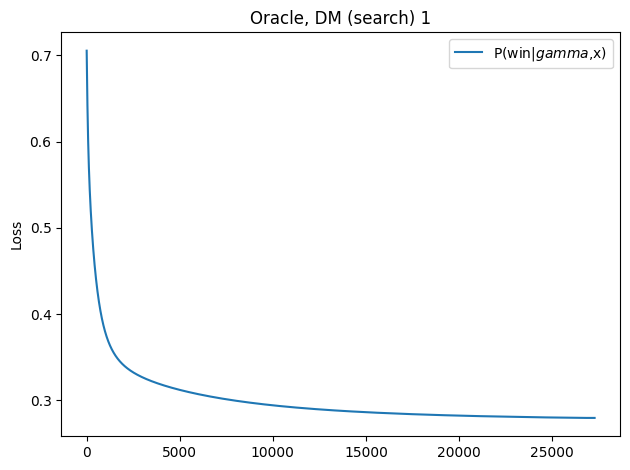

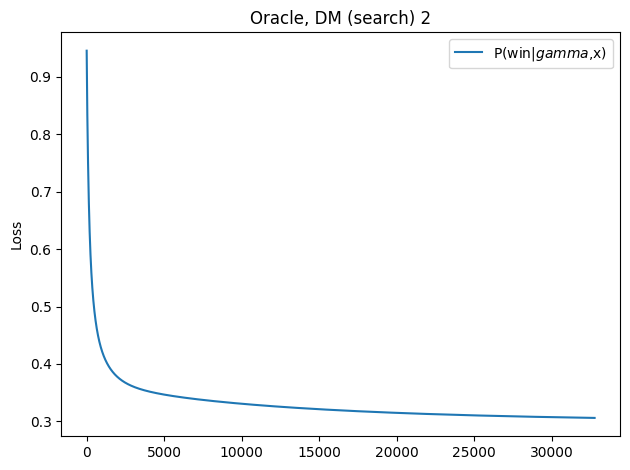

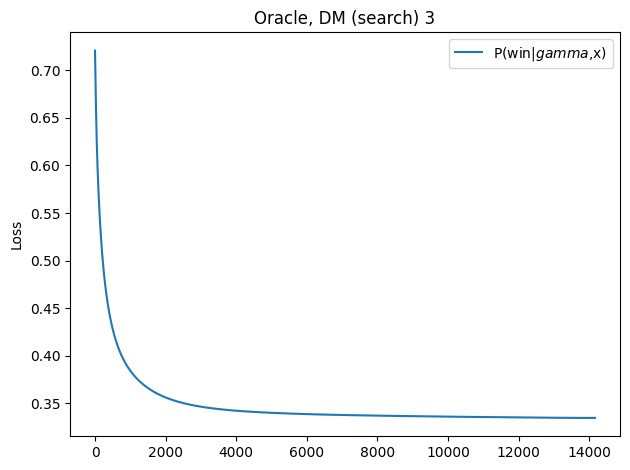

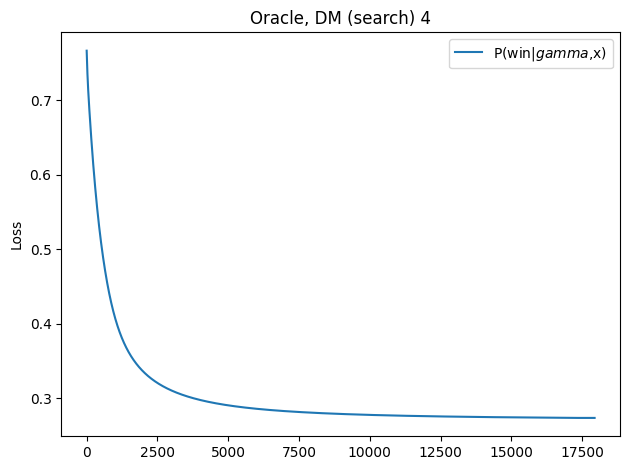

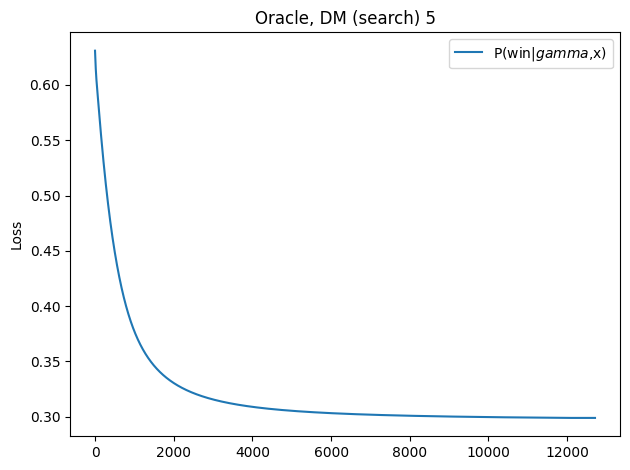

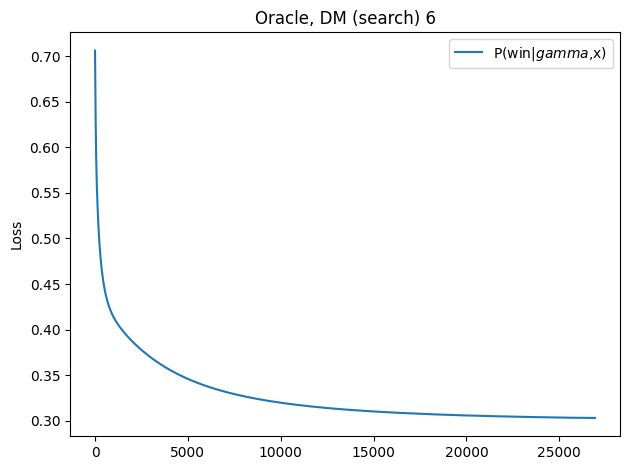

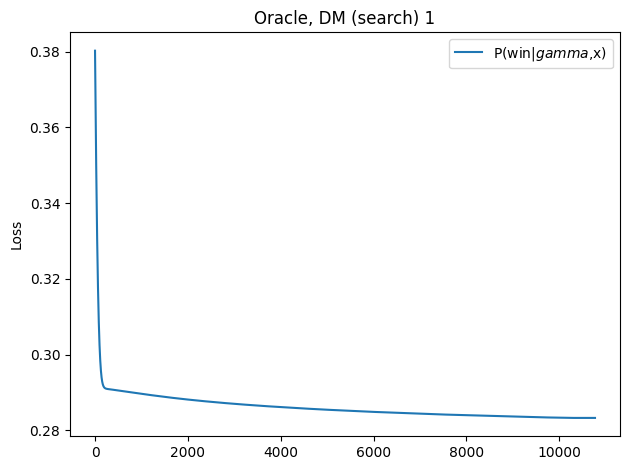

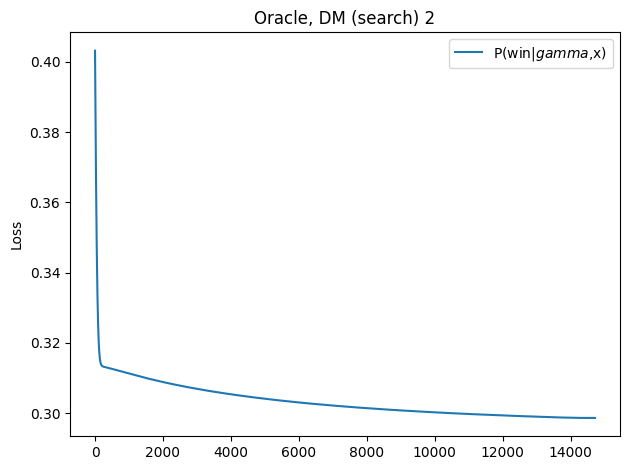

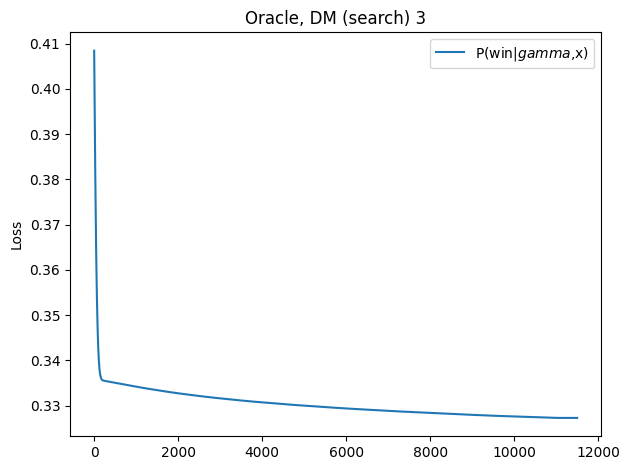

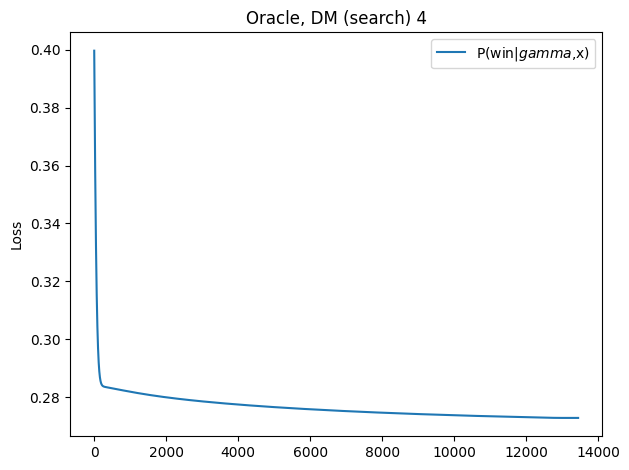

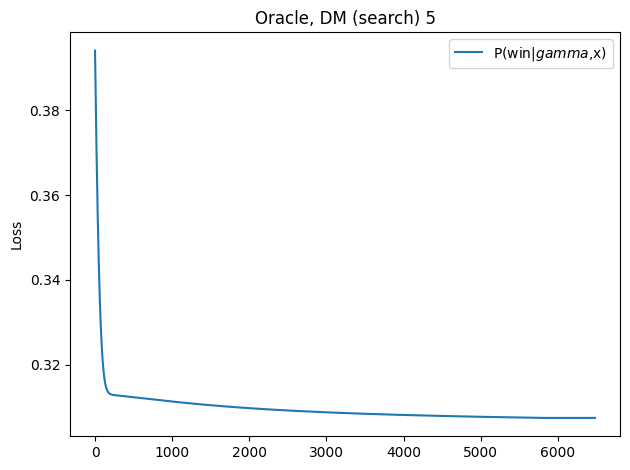

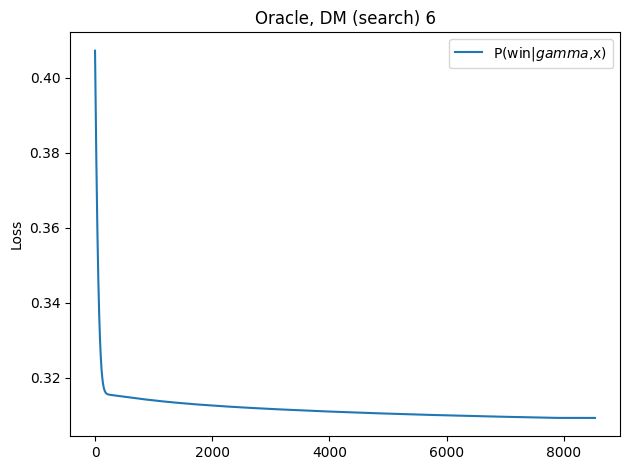

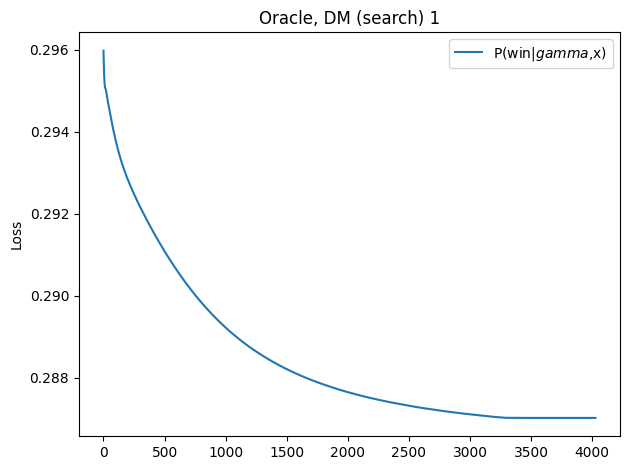

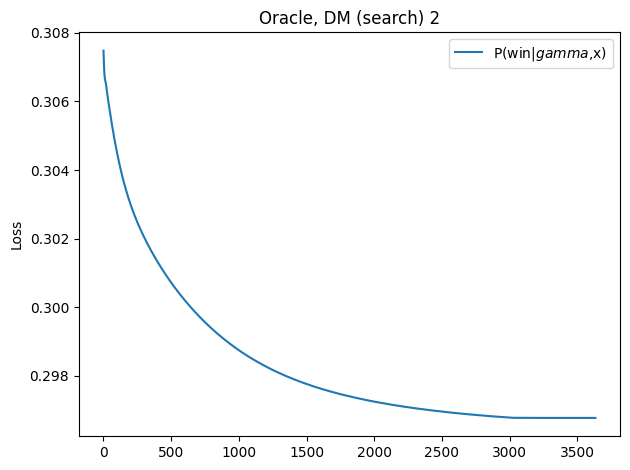

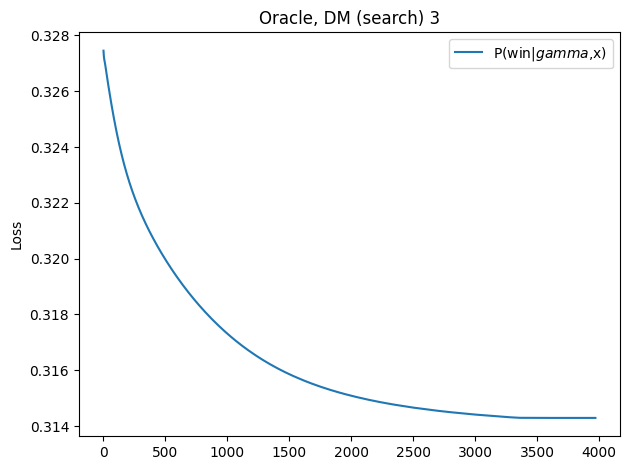

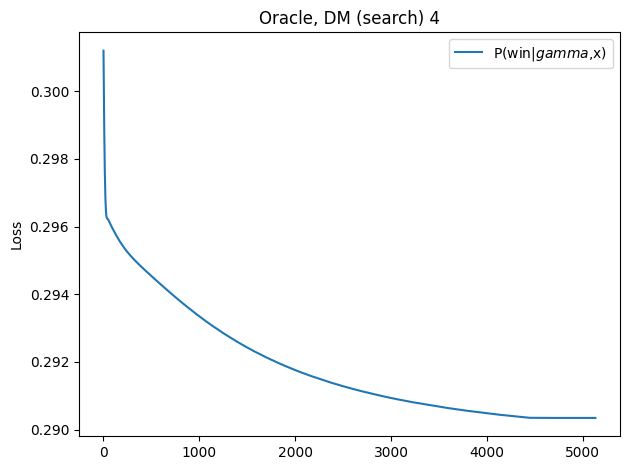

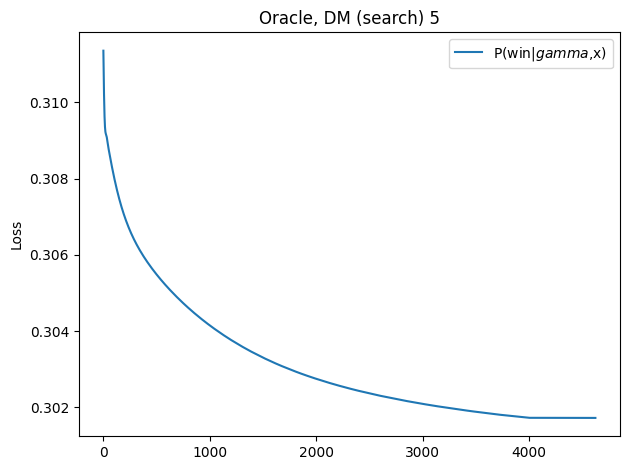

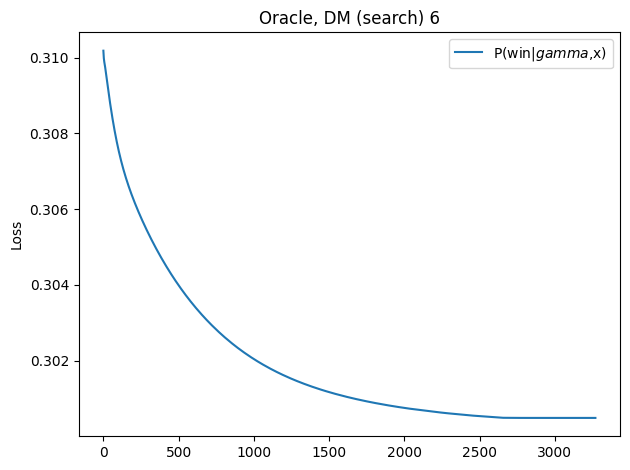

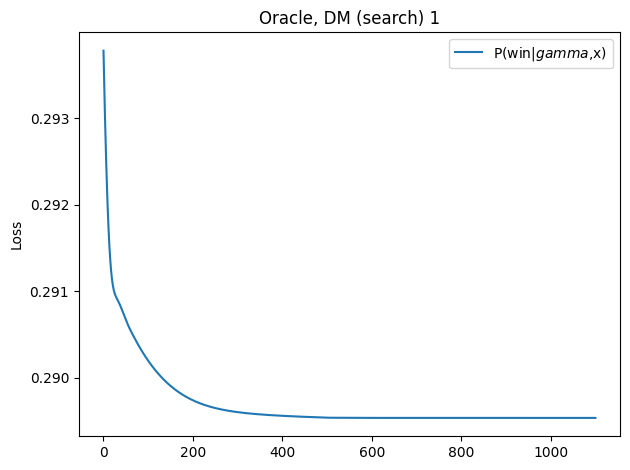

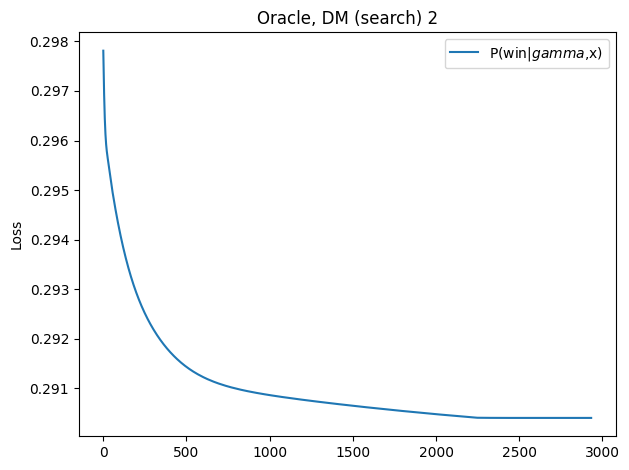

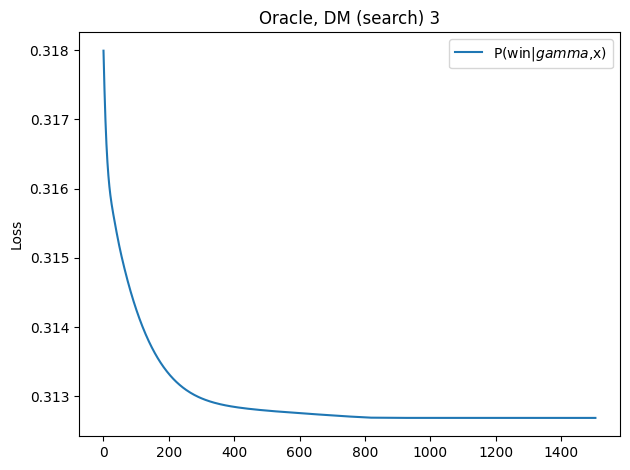

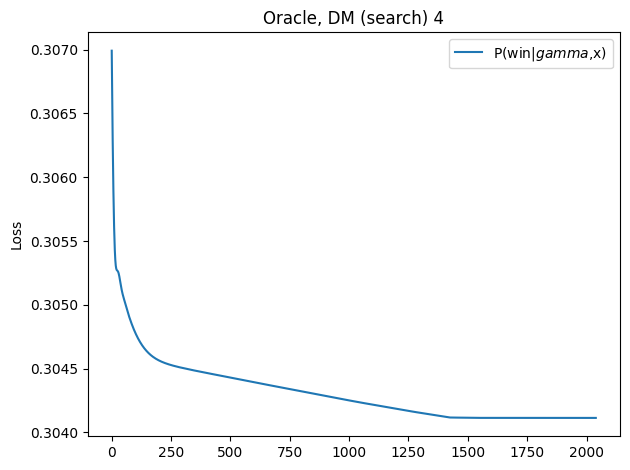

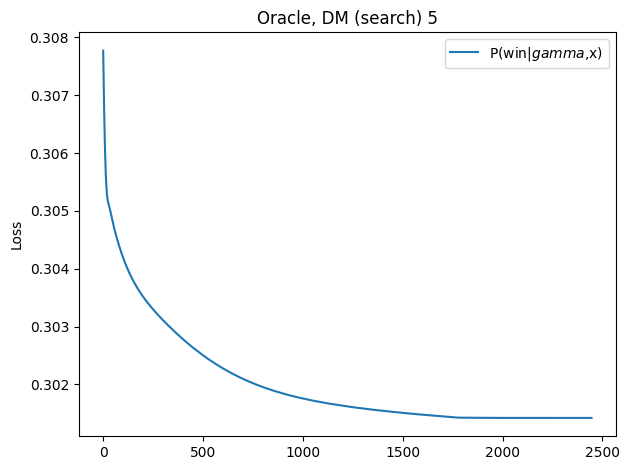

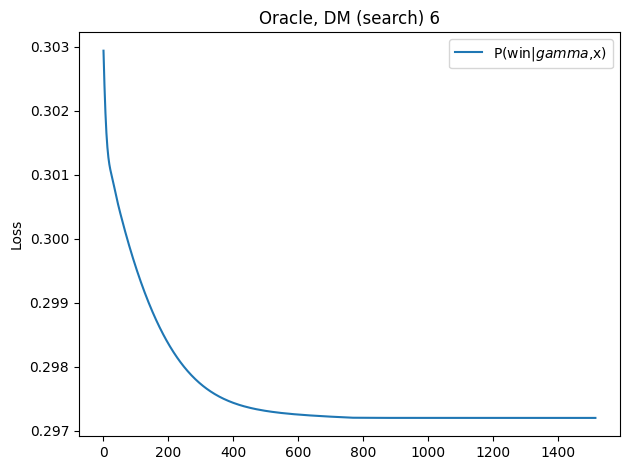

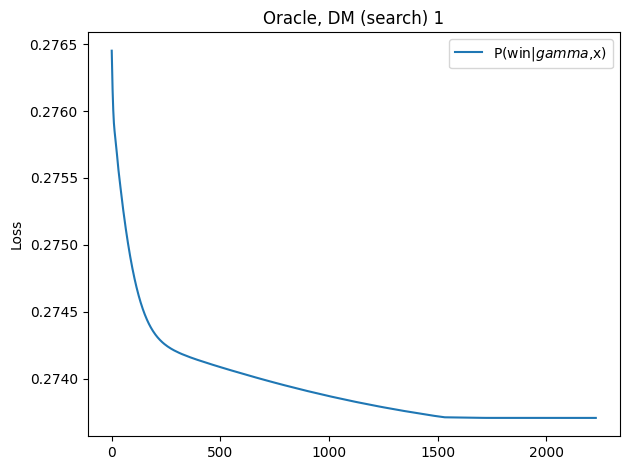

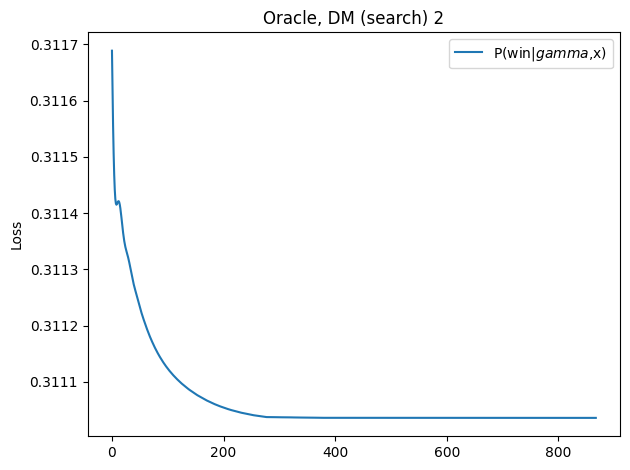

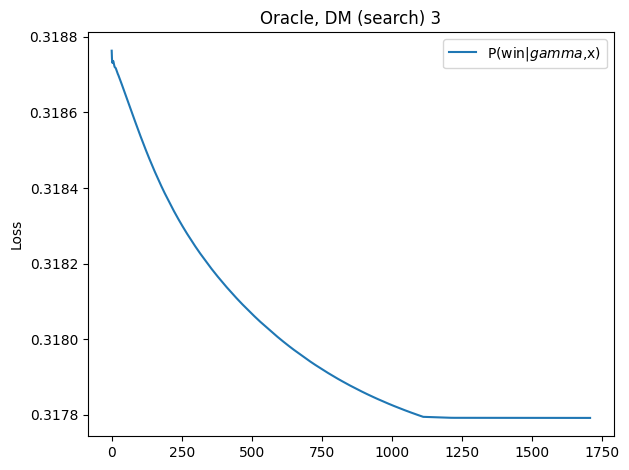

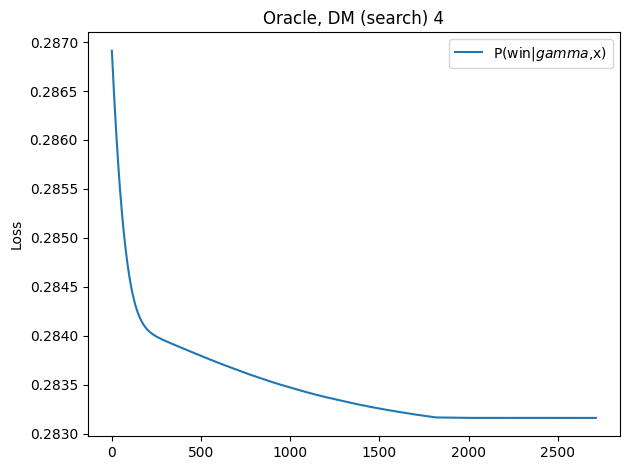

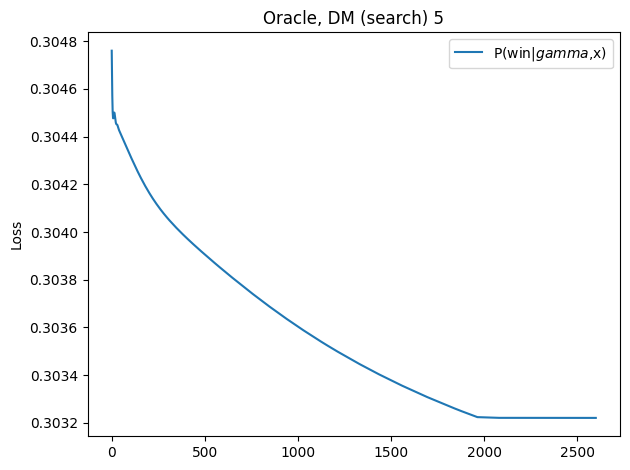

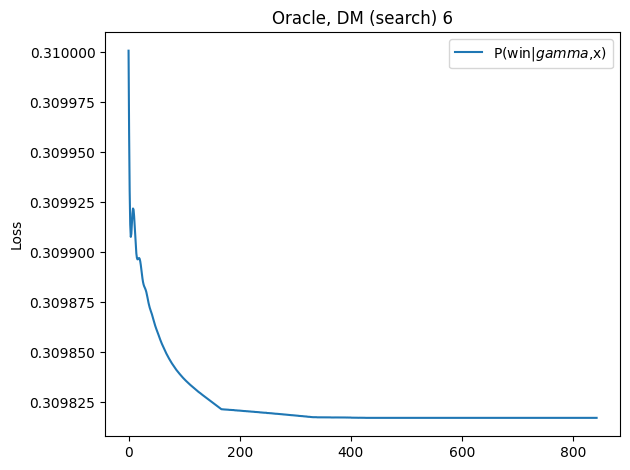

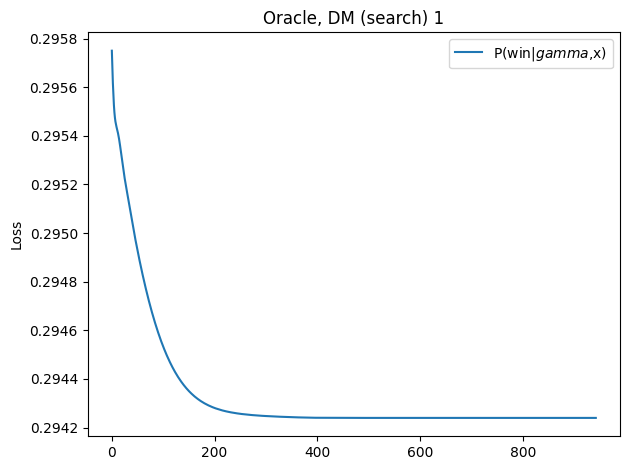

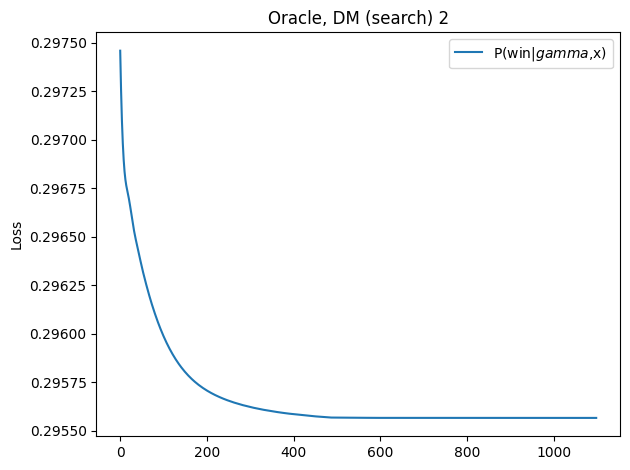

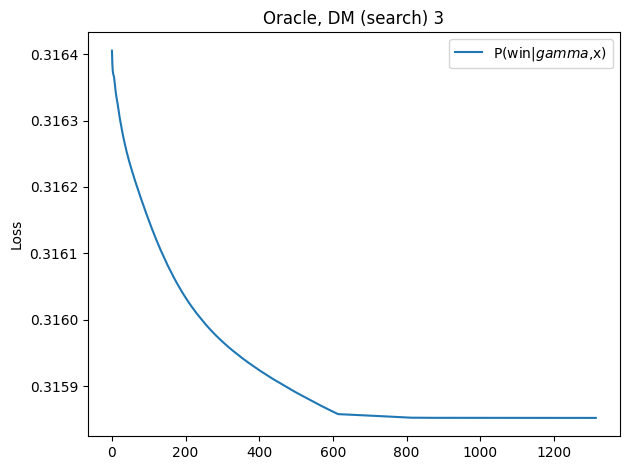

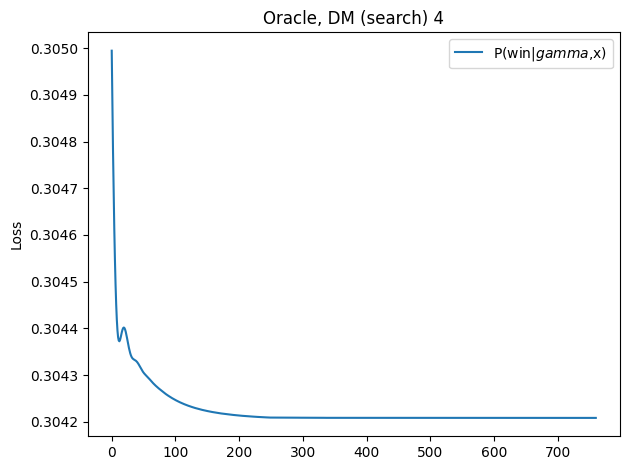

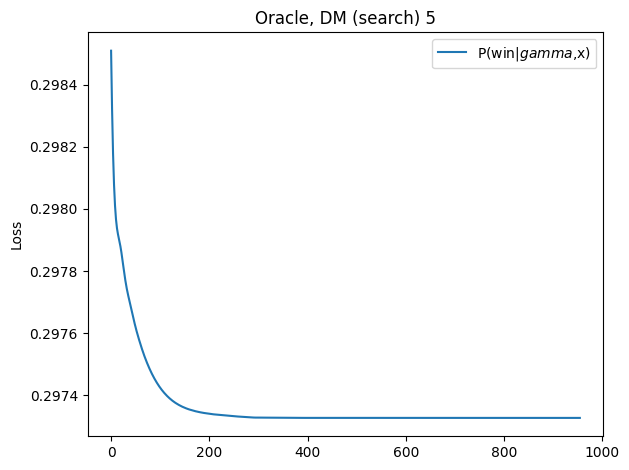

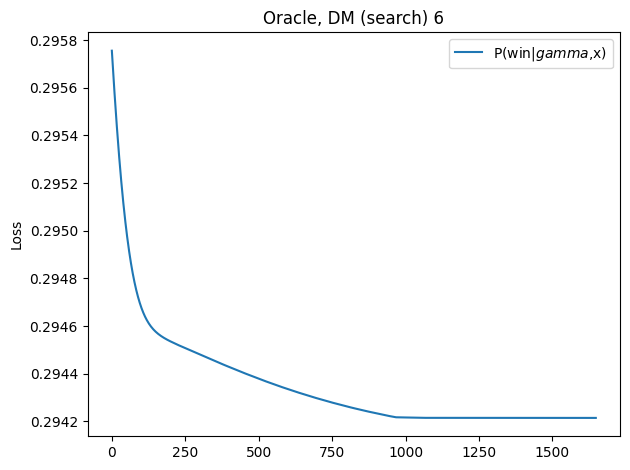

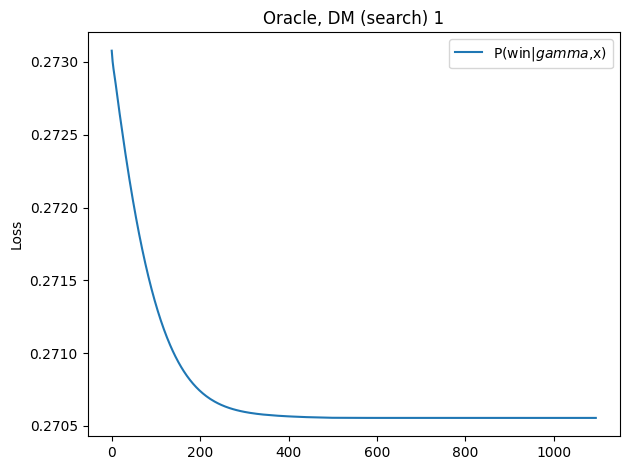

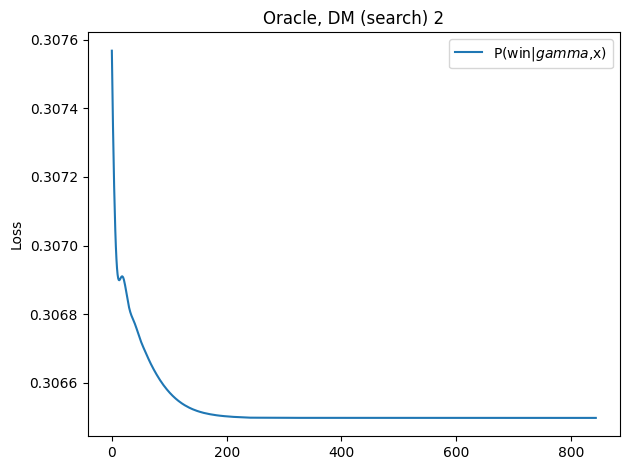

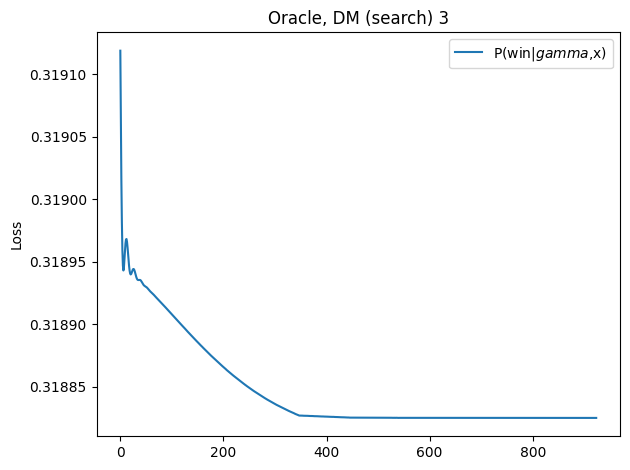

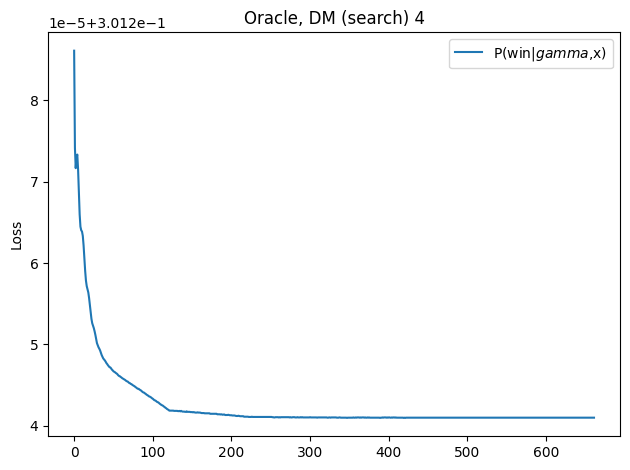

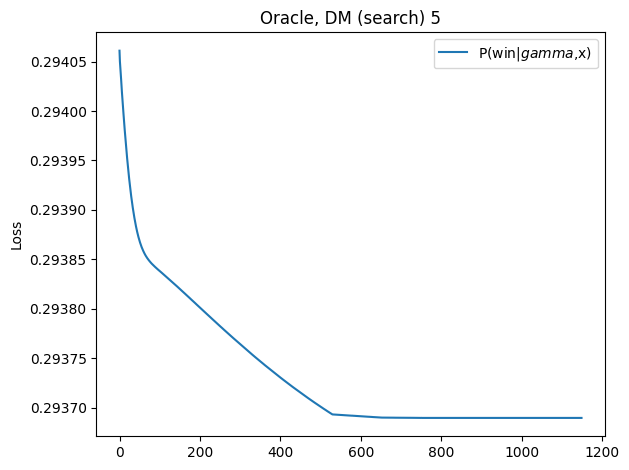

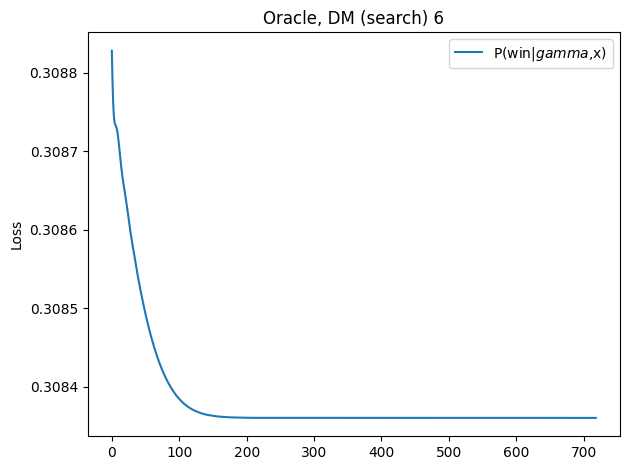

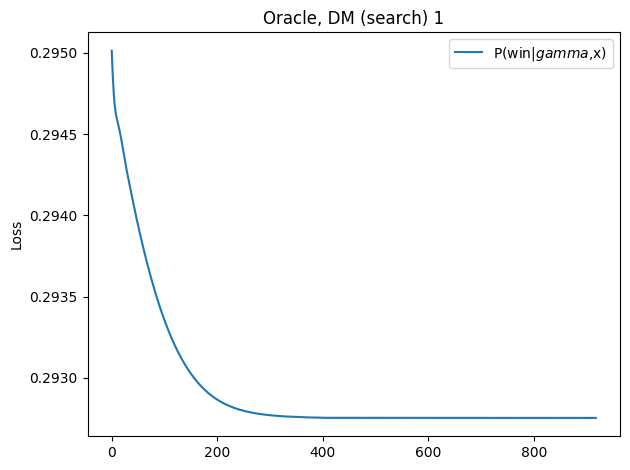

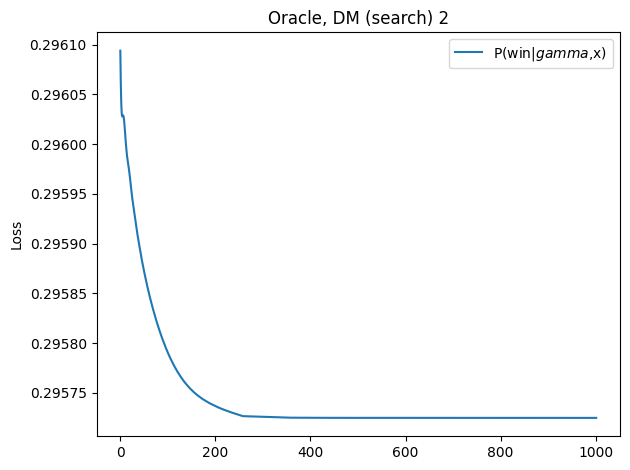

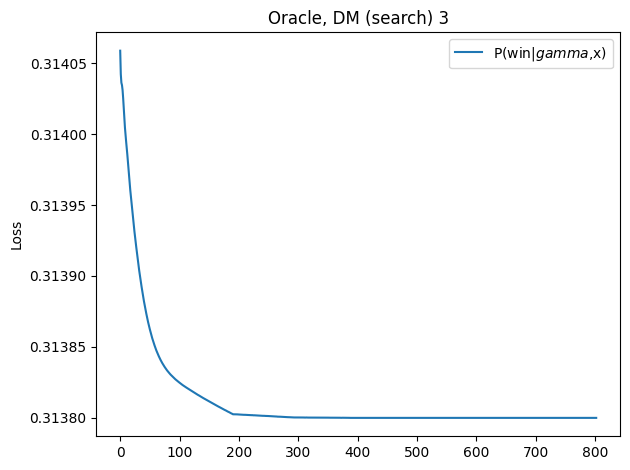

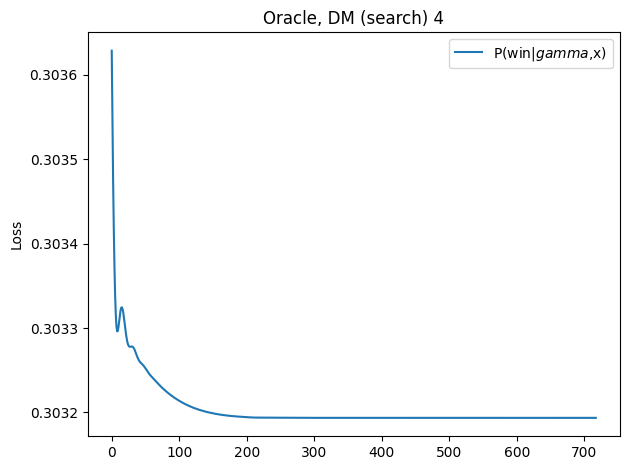

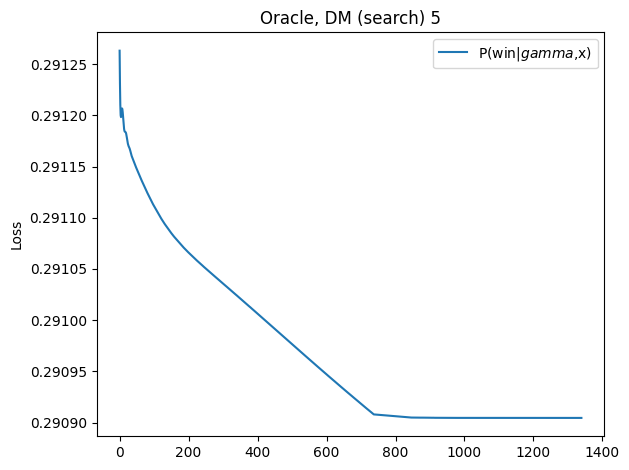

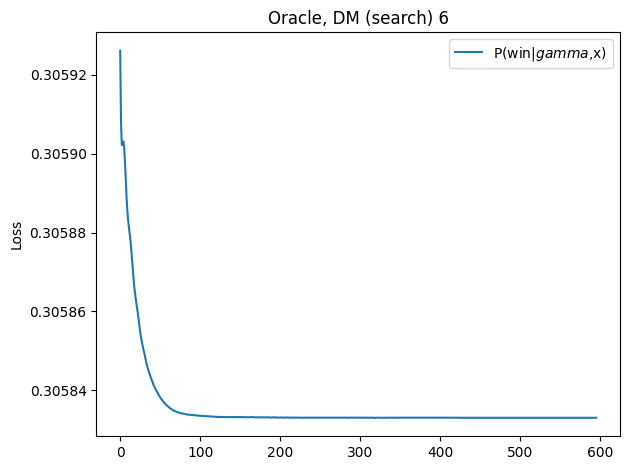

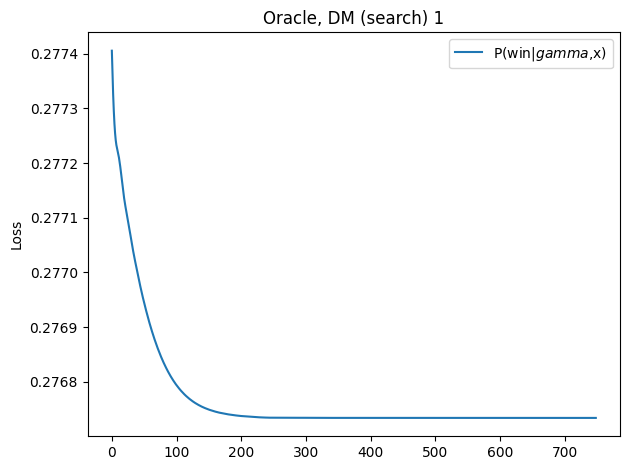

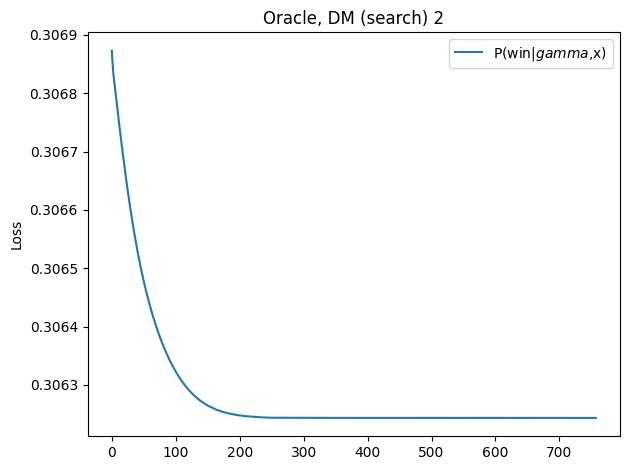

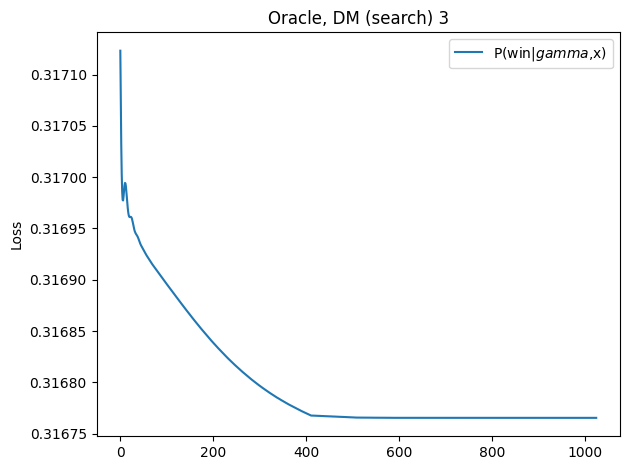

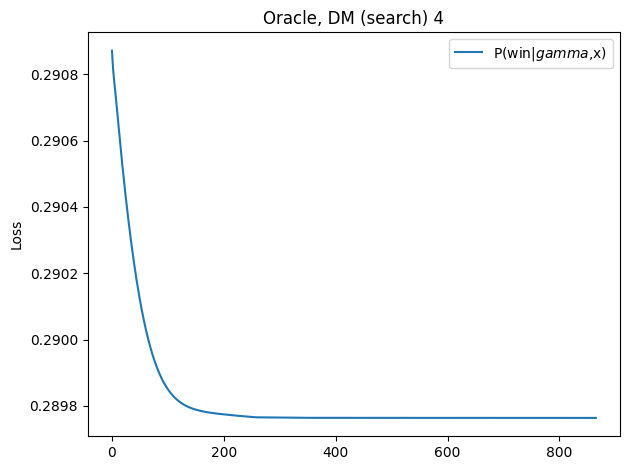

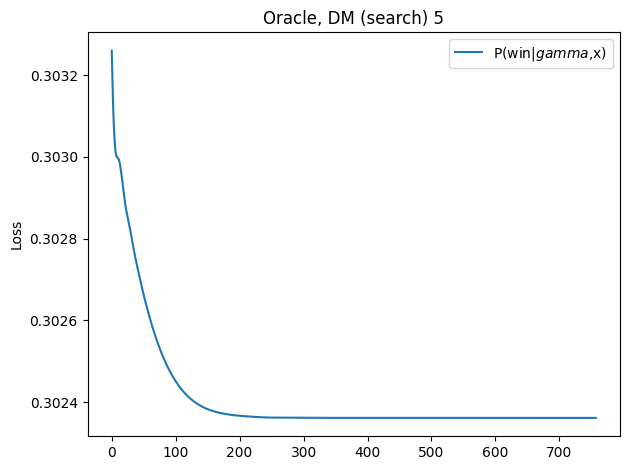

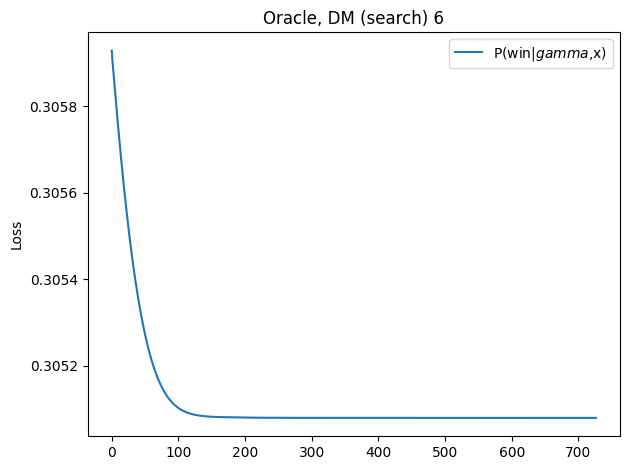

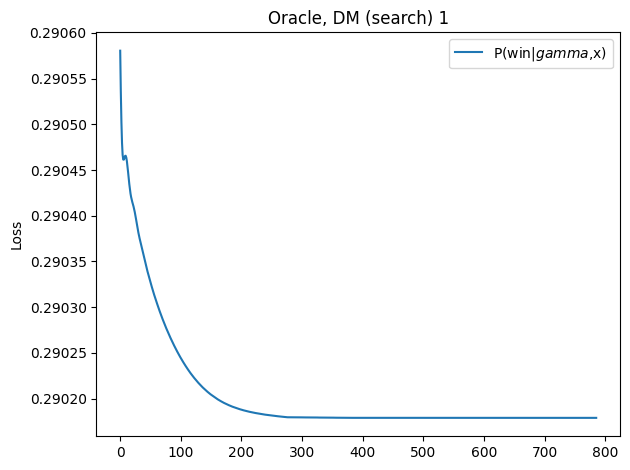

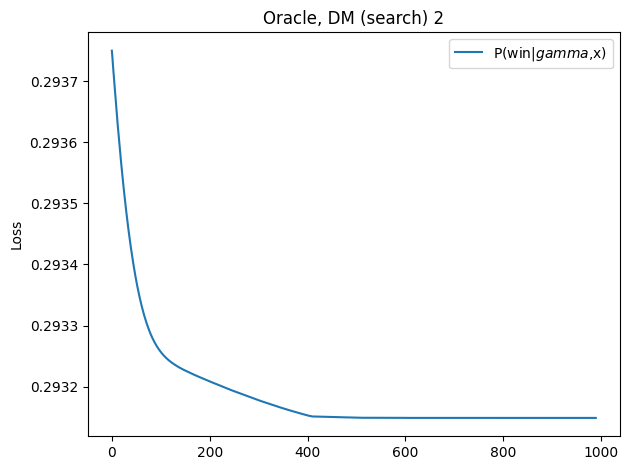

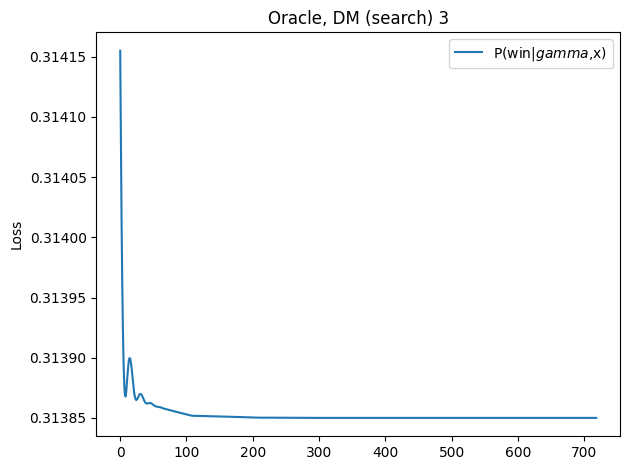

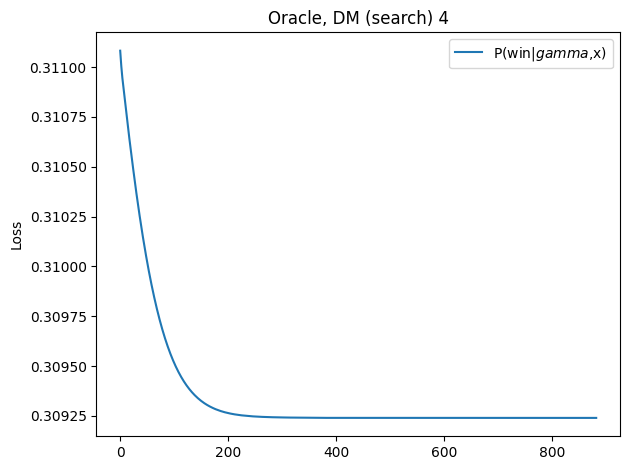

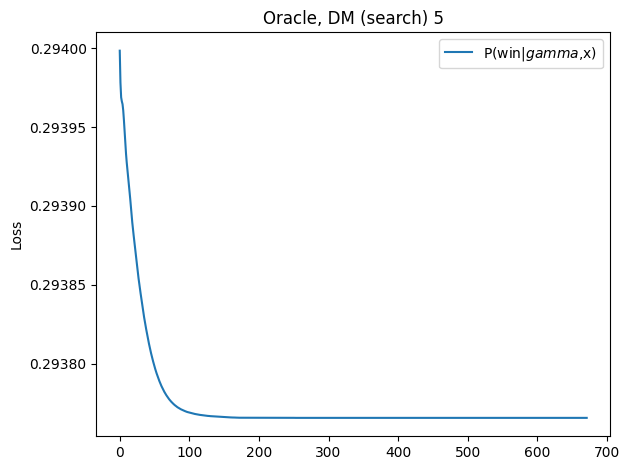

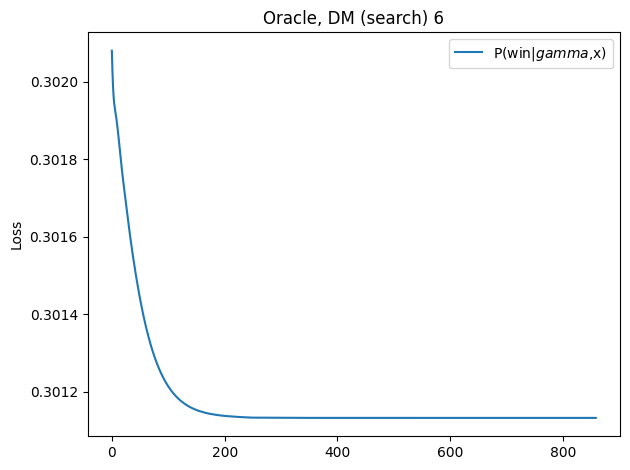

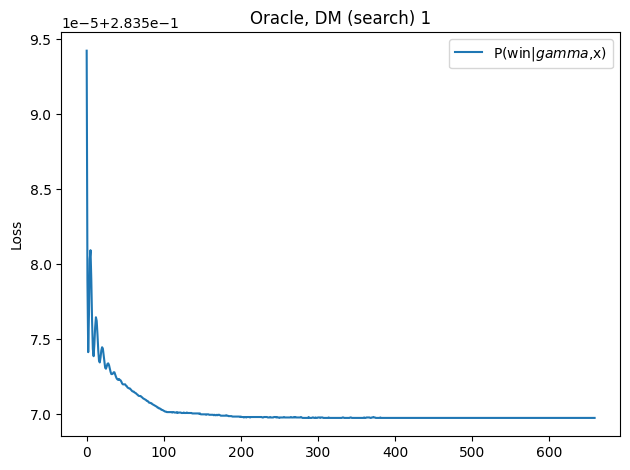

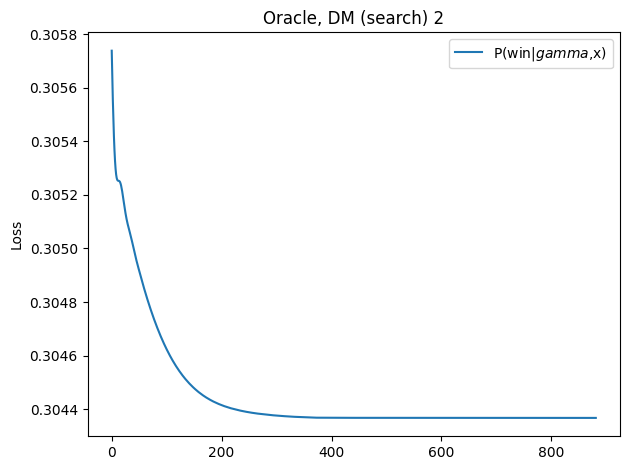

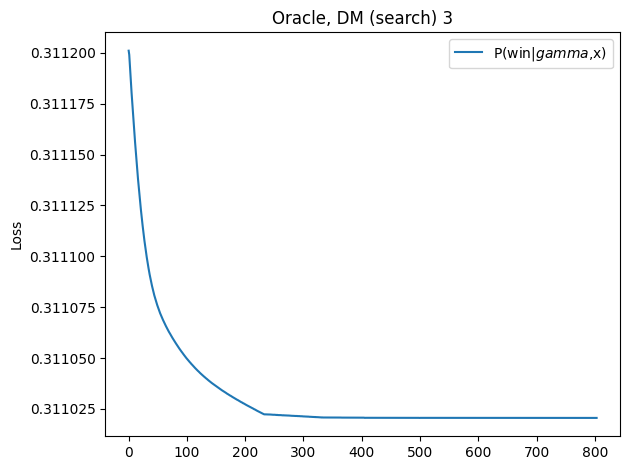

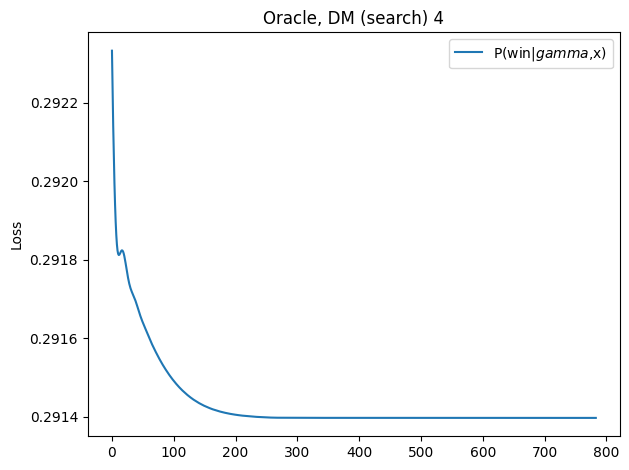

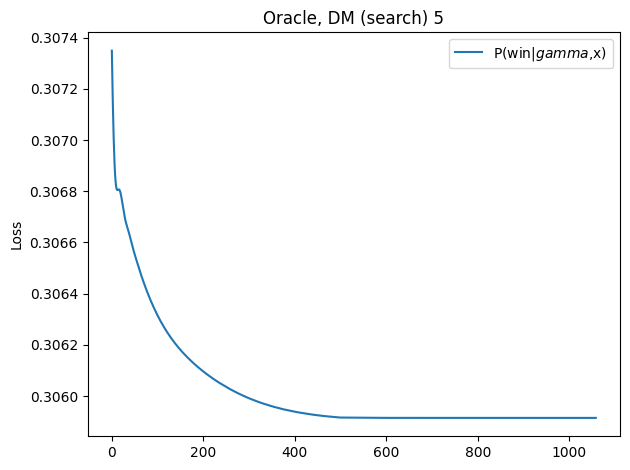

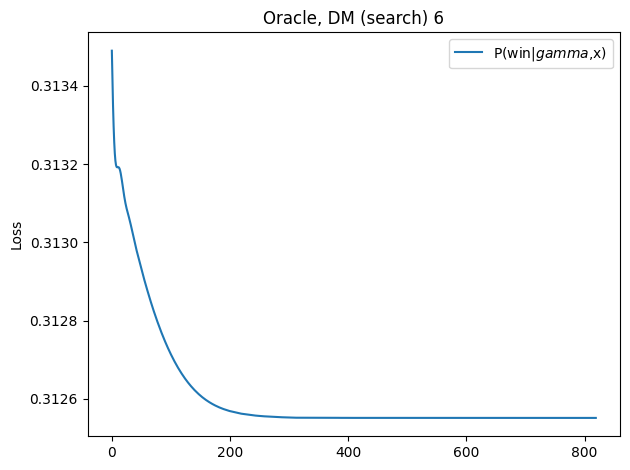

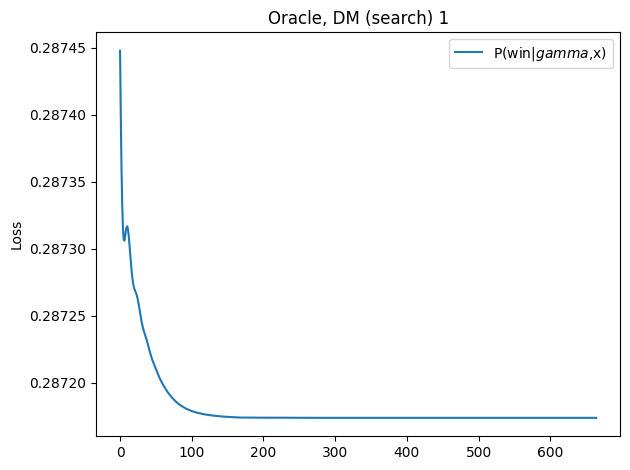

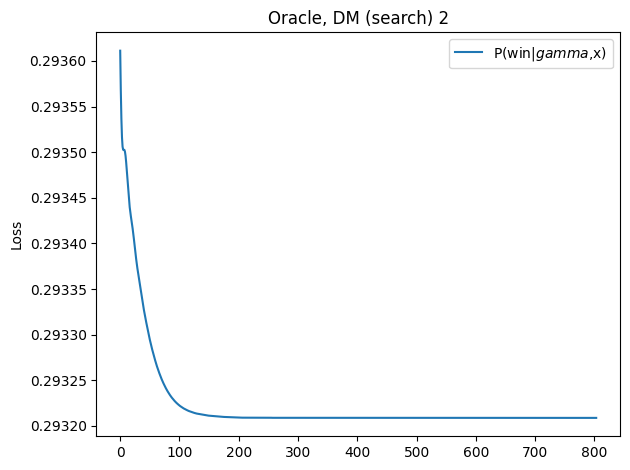

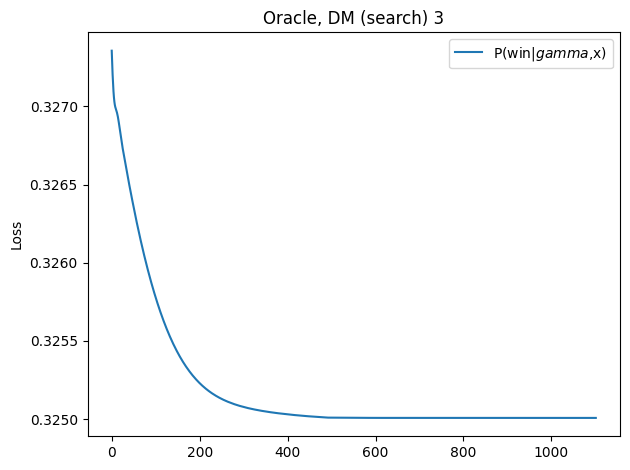

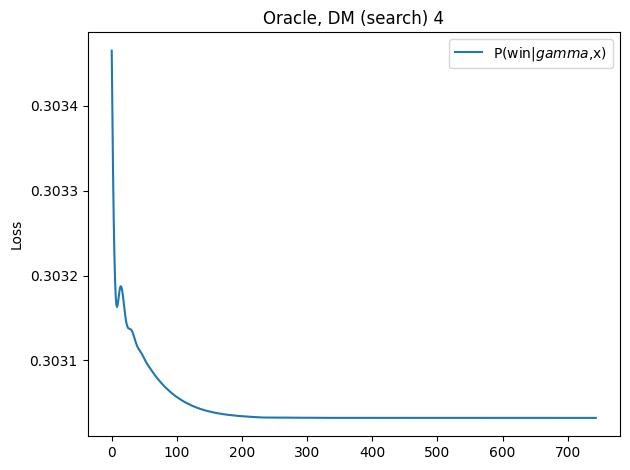

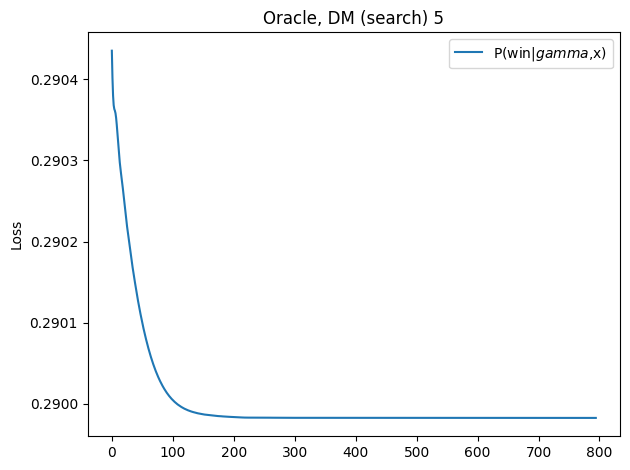

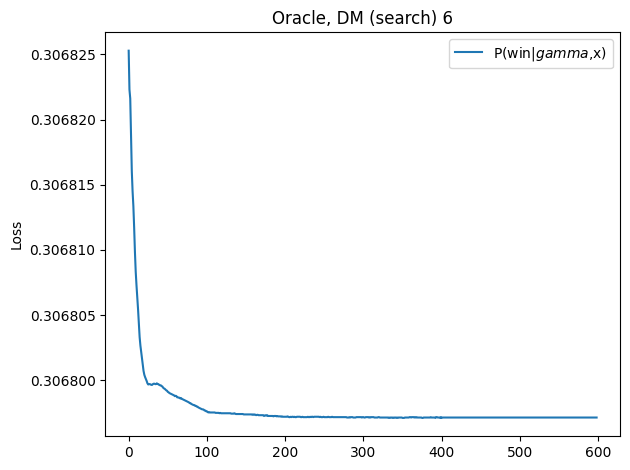

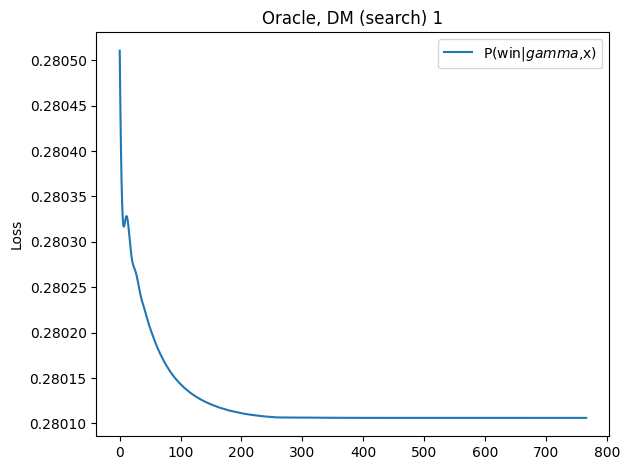

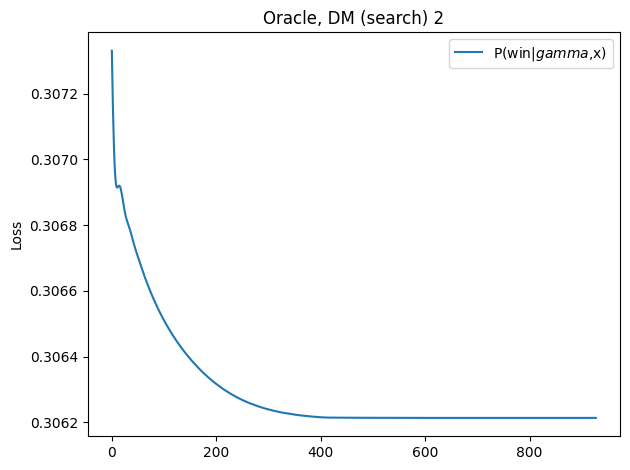

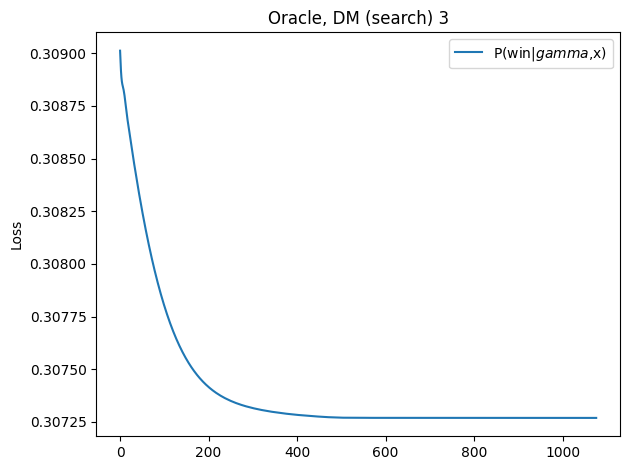

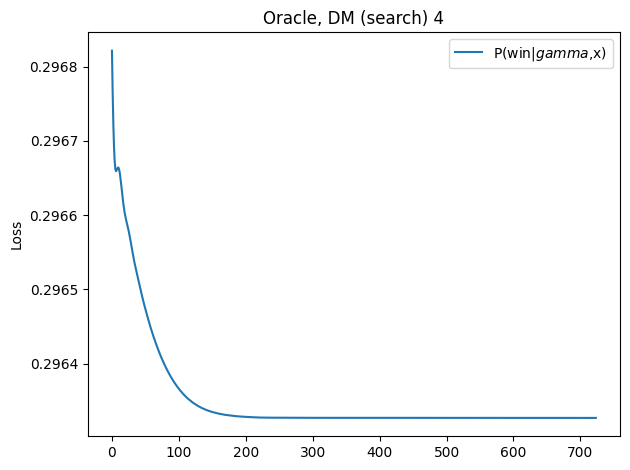

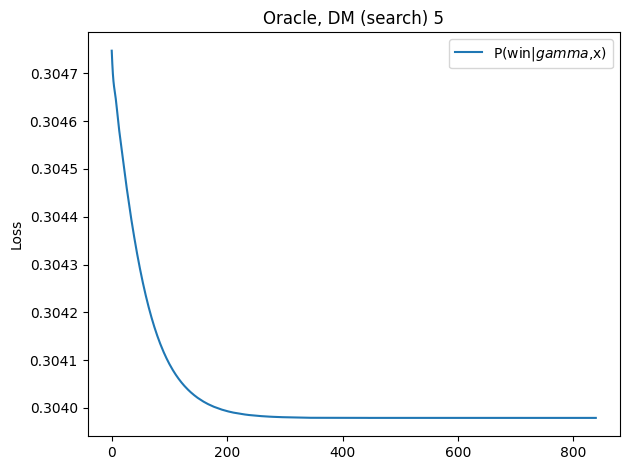

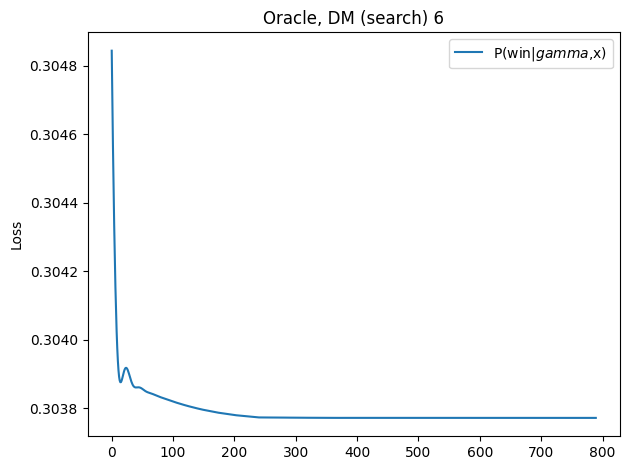

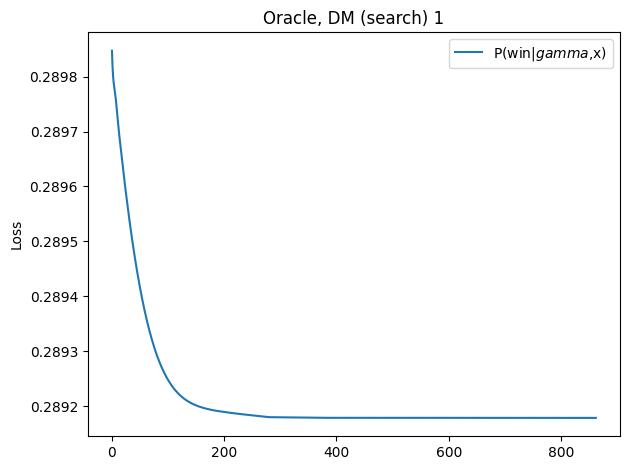

Error in callback <function flush_figures at 0x28cbcd6c0> (for post_execute), with arguments args (),kwargs {}:


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x11b4cc890>>
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
KeyboardInterrupt: 


KeyboardInterrupt: 

In [14]:
num_participants_2_metrics = {
    num_participants_per_round: run_repeated_auctions(num_participants_per_round=num_participants_per_round)
    for num_participants_per_round in range(2,9)
}

In [ ]:
fontsize=16
fig, axes = plt.subplots(1, 3, sharey='row', figsize=(15,4))

for num_participants_per_round, (revenue, welfare, surplus) in num_participants_2_metrics.items():    
    axes[0].plot(welfare, label=f'{num_participants_per_round}')
    axes[1].plot(surplus, label=f'{num_participants_per_round}')
    axes[2].plot(revenue, label=f'{num_participants_per_round}')


axes[1].set_title('Effects of Competition in Second-Price Auctions with Oracle bidders', fontsize=fontsize+4)

for i in range(3):
    axes[i].set_xlabel('Iterations', fontsize=fontsize)
    axes[i].set_xticks(list(range(0,len(revenue),2)))
    axes[i].grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

axes[0].set_ylim(0.0, None)

    
axes[0].set_ylabel('Social Welfare', fontsize=fontsize)
axes[1].set_ylabel('Social Surplus', fontsize=fontsize)
axes[2].set_ylabel('Auction Revenue', fontsize=fontsize)

handles, labels = axes[0].get_legend_handles_labels()
legend = axes[2].legend(reversed(handles),
                   reversed(labels),
                   loc='upper left',
                   bbox_to_anchor=(1.0, 1.0),
                   fontsize=fontsize)
legend.set_title('# Bidders', prop={'size': fontsize})
fig.tight_layout()

plt.show()

The leftmost plot shows social welfare (the sum of generated welfare over all participants in the auction).
As we increase the number of participants in every auction round, the probability that the advertiser with the highest value ad is participating increases, and so does expected welfare.

The middle plot shows social surplus.
As the number of participants in the auction increases, there will be stronger competition, which drives up the second price. As a result, the surplus that bidders attain decreases.

The rightmost plot shows revenue for the auctioneer.
Because of the combined effect of (1) increasing welfare and (2) decreasing surplus, we see significant increases in auction revenue as the number of participants per auction round increases.